## **Objective **
### Economic Twitter Data
*   Topic Modeling on Twitter Dataset
*   Sentiment analysis on Twitter Dataset








### **Business understanding**

### **Topic modeling**
Topic modeling is a type of statistical model for discovering the abstract "topics" that occur in a collection of texts.


*   Our task here is to discover abstract topics from tweets.


### **Sentiment analysis**
 It is used in social media monitoring, allowing businesses to gain insights about how customers feel about certain topics, and detect urgent issues in real time before they spiral out of control.


*   Our task here is to classify a tweet as a positive or negative tweet sentiment wise.




## Data Understanding
### Loading necessary packages

In [149]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import STOPWORDS,WordCloud
from gensim import corpora
import pandas as pd
import statistics
import string
import os
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

Data acquisition

For this example we have two option for data acquisition:

*   You can download Twitter dataset directly from Twitter
*   By registering as a developer using this link [Here](https://developer.twitter.com/en) 

*   Or you can use downloaded data found at Week0/data/cleaned_fintech_data.csv 



In [150]:
#from google.colab import drive
#drive.mount('/content/drive/')
#To Change my directory
#os.chdir("drive/MyDrive")
#os.listdir()

In [151]:
#To read csv file and create dataframe
tweets = pd.read_csv('processed_tweet_data.csv')
tweets.head()

,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place
0,Fri Apr 22 22:20:18 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @nikitheblogger: Irre: Annalena Baerbock sa...,0.0,0.0,de,0,355,McMc74078966,3,12,NaN,[],nikitheblogger,NaN
1,Fri Apr 22 22:19:16 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @sagt_mit: Merkel schaffte es in 1 Jahr 1 M...,0.0,0.0,de,0,505,McMc74078966,3,12,NaN,[],sagt_mit,NaN
2,Fri Apr 22 22:17:28 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @Kryptonoun: @WRi007 Pharma in Lebensmittel...,0.0,0.0,de,0,4,McMc74078966,3,12,NaN,[],"Kryptonoun,WRi007",NaN
3,Fri Apr 22 22:17:20 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @WRi007: Die #Deutschen sind ein braves Vol...,0.0,0.0,de,0,332,McMc74078966,3,12,NaN,"[{'text': 'Deutschen', 'indices': [16, 26]}, {...",WRi007,NaN
4,Fri Apr 22 22:13:15 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",RT @RolandTichy: Baerbock verkündet mal so neb...,0.0,0.0,de,0,386,McMc74078966,3,12,NaN,[],RolandTichy,NaN


In [152]:
#To get information abou the data
tweets.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24625 entries, 0 to 24624
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   created_at          24625 non-null  object 
 1   source              24625 non-null  object 
 2   original_text       24625 non-null  object 
 3   polarity            24625 non-null  float64
 4   subjectivity        24625 non-null  float64
 5   lang                24625 non-null  object 
 6   favorite_count      24625 non-null  int64  
 7   retweet_count       24625 non-null  int64  
 8   original_author     24625 non-null  object 
 9   followers_count     24625 non-null  int64  
 10  friends_count       24625 non-null  int64  
 11  possibly_sensitive  9975 non-null   object 
 12  hashtags            24625 non-null  object 
 13  user_mentions       18077 non-null  object 
 14  place               15731 non-null  object 
dtypes: float64(2), int64(4), object(9)
memory usage: 2.8+

#### Check if there are errors in the data

In [153]:
print("The number of missing value(s): {}".format(tweets.isnull().sum().sum()))
print("Columons having missing value:{}".format(tweets.columns[tweets.isnull().any()]))

The number of missing value(s): 30092
Columons having missing value:Index(['possibly_sensitive', 'user_mentions', 'place'], dtype='object')


### Data Preparation 

*   Making correction 
*   Reformatting
*   Combining Dataset




In [154]:
tweets_df = pd.DataFrame(columns=['original_text'])

tweets_df['text'] =  tweets['original_text'].to_list()


In [155]:
# drop row having Null value
tweets_df.dropna()
tweets_df

,original_text,text
0,NaN,RT @nikitheblogger: Irre: Annalena Baerbock sa...
1,NaN,RT @sagt_mit: Merkel schaffte es in 1 Jahr 1 M...
2,NaN,RT @Kryptonoun: @WRi007 Pharma in Lebensmittel...
3,NaN,RT @WRi007: Die #Deutschen sind ein braves Vol...
4,NaN,RT @RolandTichy: Baerbock verkündet mal so neb...
...,...,...
24620,NaN,RT @waglenikhil: आपल्या घरातल्या कोणत्याही कार...
24621,NaN,"RT @yadavtejashwi: चौहरमल नगर, फुलवारी शरीफ मे..."
24622,NaN,RT @Parthtiwari25: Gujarat Congress MLA arrest...
24623,NaN,RT @news24tvchannel: CM नीतीश कुमार ने तेजस्वी...


In [156]:
tweets['hashtags'].value_counts()

[]                                                                                                                                                                                                                                                                                                               16432
[{'text': 'PNPKakampiMo', 'indices': [16, 29]}, {'text': 'WeServeAndProtect', 'indices': [30, 48]}, {'text': 'TeamPNP', 'indices': [49, 57]}, {'text': 'PCADGWESTERNMINDANAO', 'indices': [58, 79]}]                                                                                                                33
[{'text': 'Mehangai', 'indices': [9, 18]}, {'text': 'fuel', 'indices': [54, 59]}, {'text': 'Android', 'indices': [77, 85]}]                                                                                                                                                                                         28
[{'text': 'petrol', 'indices': [43, 50]}, {'text': 'cheap', 'indice

## **Assignment 1 for Practice**
### Write a function that change **Null** values for columns Hashtages by mostly occured Hashtage.



In [157]:
def fill_na(df:pd.DataFrame, col_name:str):
    filled_col = df[col_name].fillna(df[col_name].mode()[0])
    return filled_col

In [158]:
tweets['hashtags'] = fill_na(tweets,'hashtags')

In [159]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24625 entries, 0 to 24624
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   created_at          24625 non-null  object 
 1   source              24625 non-null  object 
 2   original_text       24625 non-null  object 
 3   polarity            24625 non-null  float64
 4   subjectivity        24625 non-null  float64
 5   lang                24625 non-null  object 
 6   favorite_count      24625 non-null  int64  
 7   retweet_count       24625 non-null  int64  
 8   original_author     24625 non-null  object 
 9   followers_count     24625 non-null  int64  
 10  friends_count       24625 non-null  int64  
 11  possibly_sensitive  9975 non-null   object 
 12  hashtags            24625 non-null  object 
 13  user_mentions       18077 non-null  object 
 14  place               15731 non-null  object 
dtypes: float64(2), int64(4), object(9)
memory usage: 2.8+

### uni-variate Analysis on Hashtags

In [160]:
re.findall?

In [161]:
#Method to find hashtags from tweets
def find_hashtags(tweet):
    '''This function will extract hashtags'''
    return re.findall('(#[A-Za-z]+[A-Za-z0-9-_]+)', tweet)

In [162]:
# update Hashtage columon with hashtages extracted from Orignal_text columon
tweets_df['hashtags'] = tweets_df.text.apply(find_hashtags)
print(tweets_df['hashtags'])

0                                                       []
1                                                       []
2                                                       []
3        [#Deutschen, #Spritpreisen, #inflation, #Abgaben]
4                                                       []
                               ...                        
24620                                                   []
24621                                                   []
24622                                                   []
24623                                                   []
24624                                      [#IndiaAgainst]
Name: hashtags, Length: 24625, dtype: object


In [163]:
# take the rows from the hashtag columns where there are actually hashtags
hashtags_list_df = tweets_df.loc[
                       tweets_df.hashtags.apply(
                           lambda hashtags_list: hashtags_list !=[]
                       ),['hashtags']]

In [164]:
hashtags_list_df

,hashtags
3,"[#Deutschen, #Spritpreisen, #inflation, #Abgaben]"
6,[#Baerbock]
11,[#IchHabeNICHTMitgemacht]
12,[#Assange]
15,"[#Assange, #Held]"
...,...
24571,"[#PNPKakampiMo, #WeServeAndProtect, #TeamPNP, ..."
24572,"[#PNPKakampiMo, #WeServeAndProtect, #TeamPNP, ..."
24574,"[#PNPKakampiMo, #WeServeAndProtect, #TeamPNP, ..."
24589,"[#AAP, #AAP]"


In [165]:
 #create dataframe where each use of hashtag gets its own row
flattened_hashtags_df = pd.DataFrame(
    [hashtag for hashtags_list in hashtags_list_df.hashtags
    for hashtag in hashtags_list],
    columns=['hashtag'])

In [166]:
flattened_hashtags_df

,hashtag
0,#Deutschen
1,#Spritpreisen
2,#inflation
3,#Abgaben
4,#Baerbock
...,...
19367,#TeamPNP
19368,#PCADGWESTERNMINDANAO
19369,#AAP
19370,#AAP


In [167]:
#add flatten_hashtags to tweet_df
tweets_df["flattened_hashtags"]= flattened_hashtags_df

In [168]:
tweets_df

,original_text,text,hashtags,flattened_hashtags
0,NaN,RT @nikitheblogger: Irre: Annalena Baerbock sa...,[],#Deutschen
1,NaN,RT @sagt_mit: Merkel schaffte es in 1 Jahr 1 M...,[],#Spritpreisen
2,NaN,RT @Kryptonoun: @WRi007 Pharma in Lebensmittel...,[],#inflation
3,NaN,RT @WRi007: Die #Deutschen sind ein braves Vol...,"[#Deutschen, #Spritpreisen, #inflation, #Abgaben]",#Abgaben
4,NaN,RT @RolandTichy: Baerbock verkündet mal so neb...,[],#Baerbock
...,...,...,...,...
24620,NaN,RT @waglenikhil: आपल्या घरातल्या कोणत्याही कार...,[],NaN
24621,NaN,"RT @yadavtejashwi: चौहरमल नगर, फुलवारी शरीफ मे...",[],NaN
24622,NaN,RT @Parthtiwari25: Gujarat Congress MLA arrest...,[],NaN
24623,NaN,RT @news24tvchannel: CM नीतीश कुमार ने तेजस्वी...,[],NaN


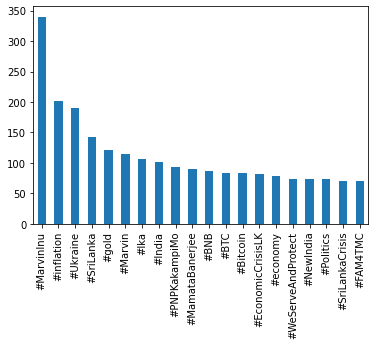

In [169]:
# To plot Top 20 Hashtags
tweets_df['flattened_hashtags'].value_counts()[:20].plot(kind='bar')
plt.show()


### Analyzing data using language attribute

In [170]:
def text_transformation(df_col):
    corpus = []
    for item in df_col:
        new_item = re.sub('[^a-zA-Z]',' ',str(item))
        new_item = new_item.lower()
        new_item = new_item.split()
        new_item = [lm.lemmatize(word)for word in new_item if word not in set(stopwords.words('english'))]
        corpus.append(' '.join(str(x) for x in new_item))
    
    return corpus

In [171]:
lm = WordNetLemmatizer()

In [172]:
original_text = text_transformation(tweets['original_text'])
tweets['original_text'] = original_text

In [173]:
tweets_df['text'] = original_text

In [174]:
tweets.head()

,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place
0,Fri Apr 22 22:20:18 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",rt nikitheblogger irre annalena baerbock sagt ...,0.0,0.0,de,0,355,McMc74078966,3,12,NaN,[],nikitheblogger,NaN
1,Fri Apr 22 22:19:16 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",rt sagt mit merkel schaffte e jahr million fl ...,0.0,0.0,de,0,505,McMc74078966,3,12,NaN,[],sagt_mit,NaN
2,Fri Apr 22 22:17:28 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",rt kryptonoun wri pharma lebensmitteln trinkwa...,0.0,0.0,de,0,4,McMc74078966,3,12,NaN,[],"Kryptonoun,WRi007",NaN
3,Fri Apr 22 22:17:20 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",rt wri die deutschen sind ein brave volk mit s...,0.0,0.0,de,0,332,McMc74078966,3,12,NaN,"[{'text': 'Deutschen', 'indices': [16, 26]}, {...",WRi007,NaN
4,Fri Apr 22 22:13:15 +0000 2022,"<a href=""http://twitter.com/download/android"" ...",rt rolandtichy baerbock verk ndet mal nebenhin...,0.0,0.0,de,0,386,McMc74078966,3,12,NaN,[],RolandTichy,NaN


In [175]:
tweets_df['lang'] = tweets['lang']

In [176]:
#ploting Tweets by language 
tweets_text = pd.DataFrame(columns=['text','lang'])

tweets_text['text'] =  tweets_df['text'].to_list()
tweets_text['lang'] = tweets_df['lang'].to_list()

tweets_by_lang = tweets_text['lang'].value_counts()

<AxesSubplot:title={'center':'Top 5 languages'}, xlabel='Languages', ylabel='Number of tweets'>

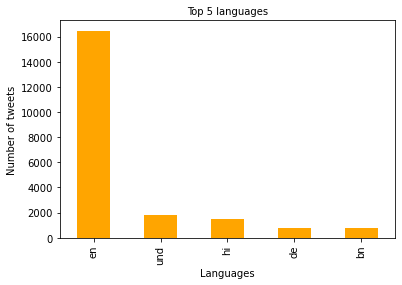

In [177]:
fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Languages', fontsize=10)
ax.set_ylabel('Number of tweets' , fontsize=10)
ax.set_title('Top 5 languages', fontsize=10)
tweets_by_lang[:5].plot(ax=ax, kind='bar', color='orange')

In [178]:
#from Our Language analysis we can see there are differnt languages we can select only tweets with english 
English_tweets = tweets_df.loc[tweets_df['lang'] =="en"]

In [179]:
English_tweets['text'].value_counts()[:20]

wordle                                                                                                                     40
rt aitcofficial unity main strength mamataofficial united india dream aim achieve time                                     22
rt samirch ansar bjp india leader bjp party known spread hate among people create chaos promote v                          20
rt itspcofficial truly believe priority ensuring justice perpetrator must adequately punished se                           19
rt aitcofficial bring current happening mr narendramodi hyped newindia economy distressed common people                    17
rt indrani ansar sheltered bjp india photo everyone reference cannot stop trying please mo shah                            17
rt sujitboseaitc ensuring justice priority ansar could repeat offender seen people bjp                                     15
rt ritabratabanerj focus justice ansar bjp india leader case anybody missed got busy running th                       

In [180]:
English_tweets

,original_text,text,hashtags,flattened_hashtags,lang
38,NaN,rt northstarcharts year yield telling u high r...,"[#gold, #silver, #crypto]",#Collapsing,en
39,NaN,rt michaelaarouet german mortgage rate went he...,[],#MarkSpitznagel,en
41,NaN,rt goldseek http co ko ffhkazg,[],#investing,en
42,NaN,rt charliebilello year mortgage rate u rise hi...,[],#bonds,en
43,NaN,rt biancoresearch rate rise something break an...,[],#illusion,en
...,...,...,...,...,...
24584,NaN,rt charanjitchanni best wish amp heartfelt con...,[],NaN,en
24586,NaN,rt pbhushan thank bajpayeemanoj beautiful mess...,[],NaN,en
24596,NaN,rt shreyatweets agree http co r zjw kgb,[],NaN,en
24599,NaN,rt tejjinc peace yatra late sunil dutt mumbai ...,[],NaN,en


###Text Preprocessing

In [181]:
#text Preprocessing
English_tweets['text']=English_tweets['text'].astype(str)
English_tweets['text'] = English_tweets['text'].apply(lambda x: x.lower())
English_tweets['text']= English_tweets['text'].apply(lambda x: x.translate(str.maketrans(' ', ' ', string.punctuation)))


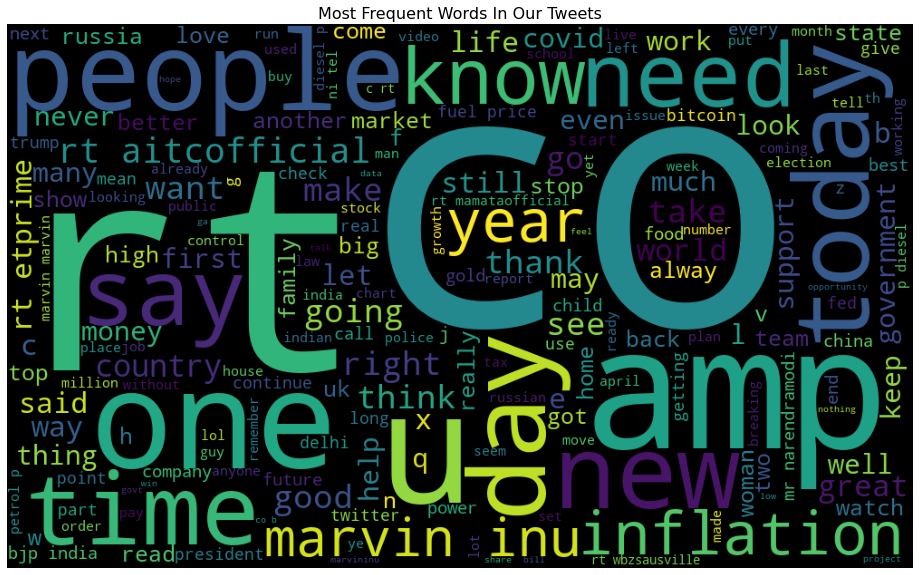

In [182]:
plt.figure(figsize=(20, 10))
plt.imshow(WordCloud(width=1000,height=600,stopwords=STOPWORDS).generate(' '.join(English_tweets.text .values)))
plt.axis('off')
plt.title('Most Frequent Words In Our Tweets',fontsize=16)
plt.show()

## **Assignment 2 for Practice** 
Add additional Exploratory analysis function to 

*   Find top 10 mentioned names.



In [184]:
tweets_text['user_mentions'] = tweets['user_mentions'].to_list()

In [186]:
tweets_by_user_mentions = tweets_text['user_mentions'].value_counts()

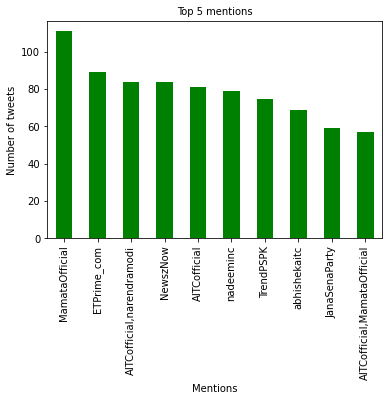

In [189]:
fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Mentions', fontsize=10)
ax.set_ylabel('Number of tweets' , fontsize=10)
ax.set_title('Top 5 mentions', fontsize=10)
tweets_by_user_mentions[:10].plot(ax=ax, kind='bar', color='green')
plt.show()

Here we cannot work with text directly when using machine learning algorithms.

Instead, we need to convert the text to numbers.
A simple and effective model for thinking about text documents in machine learning is called the Bag-of-Words Model, or BoW.

The model is simple in that it throws away all of the order information in the words and focuses on the occurrence of words in a tweets/document.

This can be done by assigning each word a unique number. Then any tweet we see can be encoded as a fixed-length vector with the length of the vocabulary of known words. The value in each position in the vector could be filled with a count or frequency of each word in the encoded document.

In [190]:
#Converting tweets to list of words For feature engineering
sentence_list = [tweet for tweet in English_tweets['text']]
word_list = [sent.split() for sent in sentence_list]

word_list[:2]


[['rt',
  'northstarcharts',
  'year',
  'yield',
  'telling',
  'u',
  'high',
  'risk',
  'something',
  'breaking',
  'system',
  'gold',
  'silver',
  'crypto'],
 ['rt',
  'michaelaarouet',
  'german',
  'mortgage',
  'rate',
  'went',
  'hear',
  'sound',
  'german',
  'real',
  'estate',
  'bubble',
  'bursting',
  'http']]

In [191]:
#Create dictionary which contains Id and word 
corpus_1 = 
word_to_id = corpora.Dictionary(word_list)
for k, v in word_to_id.items():
    print(k,"........",v)

0 ........ breaking
1 ........ crypto
2 ........ gold
3 ........ high
4 ........ northstarcharts
5 ........ risk
6 ........ rt
7 ........ silver
8 ........ something
9 ........ system
10 ........ telling
11 ........ u
12 ........ year
13 ........ yield
14 ........ bubble
15 ........ bursting
16 ........ estate
17 ........ german
18 ........ hear
19 ........ http
20 ........ michaelaarouet
21 ........ mortgage
22 ........ rate
23 ........ real
24 ........ sound
25 ........ went
26 ........ co
27 ........ ffhkazg
28 ........ goldseek
29 ........ ko
30 ........ charliebilello
31 ........ highest
32 ........ hit
33 ........ last
34 ........ level
35 ........ low
36 ........ rise
37 ........ since
38 ........ time
39 ........ anything
40 ........ biancoresearch
41 ........ break
42 ........ brnjek
43 ........ broken
44 ........ wtb
45 ........ yet
46 ........ bond
47 ........ buying
48 ........ cytvknxkzd
49 ........ every
50 ........ lanceroberts
51 ........ like
52 ........ occur
53 .....

784 ........ anders
785 ........ aslund
786 ........ composed
787 ........ nationa
788 ........ peace
789 ........ prosperity
790 ........ question
791 ........ without
792 ........ wrongly
793 ........ cbb
794 ........ chinabeigebook
795 ........ elderly
796 ........ got
797 ........ hk
798 ........ population
799 ........ remembers
800 ........ scisso
801 ........ well
802 ........ chigrl
803 ........ content
804 ........ distillate
805 ........ refiner
806 ........ shahwlgmkw
807 ........ summer
808 ........ twivtwipq
809 ........ asian
810 ........ beginning
811 ........ bny
812 ........ credit
813 ........ happen
814 ........ holding
815 ........ investor
816 ........ lisaabramowicz
817 ........ mello
818 ........ reducing
819 ........ start
820 ........ vulnerable
821 ........ approves
822 ........ bucha
823 ........ dog
824 ........ ianbremmer
825 ........ moose
826 ........ musiienko
827 ........ owner
828 ........ qwteu
829 ........ reunites
830 ........ sph
831 ........ wlady

1233 ........ famer
1234 ........ fr
1235 ........ hall
1236 ........ jet
1237 ........ nhljets
1238 ........ saddened
1239 ........ winnipeg
1240 ........ billfoxla
1241 ........ drowned
1242 ........ eagle
1243 ........ grande
1244 ........ guard
1245 ........ multiple
1246 ........ national
1247 ........ pas
1248 ........ rio
1249 ........ source
1250 ........ whil
1251 ........ leemac
1252 ........ rip
1253 ........ sir
1254 ........ ar
1255 ........ canada
1256 ........ ee
1257 ........ gd
1258 ........ information
1259 ........ jenniferelle
1260 ........ klv
1261 ........ monday
1262 ........ restriction
1263 ........ travel
1264 ........ annamgainey
1265 ........ asked
1266 ........ boy
1267 ........ dad
1268 ........ de
1269 ........ du
1270 ........ introduce
1271 ........ moment
1272 ........ panth
1273 ........ qu
1274 ........ remembering
1275 ........ shyly
1276 ........ sport
1277 ........ sweet
1278 ........ ambassador
1279 ........ canadiens
1280 ........ entire
1281 ..

2062 ........ wondering
2063 ........ aired
2064 ........ audio
2065 ........ cnn
2066 ........ ja
2067 ........ responsibility
2068 ........ told
2069 ........ jail
2070 ........ johncusack
2071 ........ participate
2072 ........ perjury
2073 ........ perjuring
2074 ........ ro
2075 ........ doe
2076 ........ incite
2077 ........ reallyamerican
2078 ........ deadly
2079 ........ indicted
2080 ........ overthrow
2081 ........ robreiner
2082 ........ increase
2083 ........ khdcbvsz
2084 ........ pain
2085 ........ producer
2086 ........ schiffgold
2087 ........ able
2088 ........ hold
2089 ........ nasdaq
2090 ........ resumed
2091 ........ netflix
2092 ........ quarter
2093 ........ subscriber
2094 ........ exceed
2095 ........ finan
2096 ........ aggressive
2097 ........ med
2098 ........ nancy
2099 ........ websitesbynancy
2100 ........ claimed
2101 ........ labor
2102 ........ powell
2103 ........ stock
2104 ........ worker
2105 ........ gotten
2106 ........ impossible
2107 ........

2522 ........ ownership
2523 ........ beware
2524 ........ burning
2525 ........ dept
2526 ........ fascis
2527 ........ maxkingsleyeh
2528 ........ tryna
2529 ........ fascism
2530 ........ fiorellaisabelm
2531 ........ socialis
2532 ........ totalitarian
2533 ........ accumulate
2534 ........ carbon
2535 ........ drive
2536 ........ ehmademmar
2537 ........ funded
2538 ........ plantation
2539 ........ tree
2540 ........ advance
2541 ........ atqurr
2542 ........ rv
2543 ........ boss
2544 ........ essence
2545 ........ function
2546 ........ workstoppagepod
2547 ........ calebmaupin
2548 ........ defends
2549 ........ hol
2550 ........ inherently
2551 ........ populism
2552 ........ populist
2553 ........ clue
2554 ........ proof
2555 ........ trentcapelli
2556 ........ based
2557 ........ blackstone
2558 ........ rent
2559 ........ americafreedomt
2560 ........ different
2561 ........ dinesh
2562 ........ direction
2563 ........ explains
2564 ........ souza
2565 ........ easiest
25

3012 ........ scottadamssays
3013 ........ sounding
3014 ........ fit
3015 ........ half
3016 ........ logan
3017 ........ masked
3018 ........ passenger
3019 ........ percent
3020 ........ sitting
3021 ........ failed
3022 ........ nutshell
3023 ........ presidency
3024 ........ dependi
3025 ........ bleed
3026 ........ bounce
3027 ........ dead
3028 ........ phcaimsv
3029 ........ abot
3030 ........ mf
3031 ........ pwdfdg
3032 ........ running
3033 ........ stability
3034 ........ lagkvdux
3035 ........ nq
3036 ........ prediction
3037 ........ kpou
3038 ........ pdupv
3039 ........ digital
3040 ........ scnwxipgk
3041 ........ travesty
3042 ........ bps
3043 ........ creating
3044 ........ expectation
3045 ........ guidance
3046 ........ nuke
3047 ........ rmsszpn
3048 ........ verbal
3049 ........ bemxygfzva
3050 ........ fix
3051 ........ afc
3052 ........ alive
3053 ........ bearish
3054 ........ cmfc
3055 ........ fcf
3056 ........ generate
3057 ........ zuxabacsip
3058 .......

3792 ........ poland
3793 ........ reaction
3794 ........ best
3795 ........ fatbabyfunds
3796 ........ mnhi
3797 ........ multi
3798 ........ thinking
3799 ........ xymgm
3800 ........ fundamental
3801 ........ patternprofits
3802 ........ richardmoglen
3803 ........ upst
3804 ........ express
3805 ........ sadness
3806 ........ kgbkqtvs
3807 ........ margin
3808 ........ oems
3809 ........ traditional
3810 ........ dannyl
3811 ........ solid
3812 ........ calculator
3813 ........ compound
3814 ........ genius
3815 ........ tiktokinvestors
3816 ........ motivation
3817 ........ qullamaggie
3818 ........ buccocapital
3819 ........ levine
3820 ........ matt
3821 ........ rgg
3822 ........ usually
3823 ........ vd
3824 ........ brisk
3825 ........ compounding
3826 ........ sustainably
3827 ........ improved
3828 ........ lot
3829 ........ mayhem
3830 ........ touching
3831 ........ uvxy
3832 ........ gorillaz
3833 ........ lamer
3834 ........ neerajka
3835 ........ version
3836 ........ 

4334 ........ paper
4335 ........ quietly
4336 ........ released
4337 ........ baby
4338 ........ rgvrunner
4339 ........ suwmbazeai
4340 ........ dye
4341 ........ egg
4342 ........ marshablackburn
4343 ........ normal
4344 ........ euay
4345 ........ spend
4346 ........ wcpto
4347 ........ zelensky
4348 ........ agrees
4349 ........ alyssa
4350 ........ asshole
4351 ........ milano
4352 ........ timetovotered
4353 ........ laurenboebert
4354 ........ brnovich
4355 ........ discovered
4356 ........ evidence
4357 ........ handed
4358 ........ operation
4359 ........ trafficking
4360 ........ yuma
4361 ........ cgnuotw
4362 ........ gun
4363 ........ initiative
4364 ........ undermine
4365 ........ convention
4366 ........ envisioned
4367 ........ framer
4368 ........ localpolice
4369 ........ wtprpoed
4370 ........ itxu
4371 ........ jcobb
4372 ........ kee
4373 ........ tall
4374 ........ lesson
4375 ........ livingmagazinew
4376 ........ navy
4377 ........ pirate
4378 ........ porch


4730 ........ closing
4731 ........ purchased
4732 ........ speculator
4733 ........ dp
4734 ........ northmantrader
4735 ........ xwwxplq
4736 ........ carlquintanilla
4737 ........ cnbc
4738 ........ sullycnbc
4739 ........ warrenbuffett
4740 ........ xexjfxjpcq
4741 ........ mpitpkxi
4742 ........ credibility
4743 ........ gerberkawasaki
4744 ........ usi
4745 ........ xjpxse
4746 ........ oftsrt
4747 ........ relea
4748 ........ sbr
4749 ........ shall
4750 ........ upper
4751 ........ financialjuice
4752 ........ bottom
4753 ........ lake
4754 ........ sullyfoto
4755 ........ gyvrhgpfv
4756 ........ schwarzenegger
4757 ........ jcus
4758 ........ junk
4759 ........ riskreversal
4760 ........ eeyjfbu
4761 ........ resistance
4762 ........ chrisevans
4763 ........ eye
4764 ........ movie
4765 ........ depress
4766 ........ hyperdeflationary
4767 ........ jh
4768 ........ signal
4769 ........ tuesday
4770 ........ bound
4771 ........ collapse
4772 ........ effective
4773 ........ lo


5164 ........ unexpected
5165 ........ agr
5166 ........ bagheri
5167 ........ iranian
5168 ........ kani
5169 ........ necessary
5170 ........ charlie
5171 ........ greenfinance
5172 ........ lsegplc
5173 ........ walker
5174 ........ attended
5175 ........ british
5176 ........ citizenshi
5177 ........ sarahjebner
5178 ........ alumnus
5179 ........ kcl
5180 ........ llm
5181 ........ brunner
5182 ........ chukaumunna
5183 ........ emea
5184 ........ headquarters
5185 ........ magnus
5186 ........ honour
5187 ........ lively
5188 ........ qkjrhwuvs
5189 ........ exchequer
5190 ........ recovery
5191 ........ rishisunak
5192 ........ financ
5193 ........ wish
5194 ........ denys
5195 ........ ivankorcok
5196 ........ janlipavsky
5197 ........ met
5198 ........ shmyhal
5199 ........ occasion
5200 ........ path
5201 ........ platinumjubilee
5202 ........ bryn
5203 ........ concert
5204 ........ kammers
5205 ........ nger
5206 ........ opera
5207 ........ renowned
5208 ........ singer
52

5675 ........ industry
5676 ........ segment
5677 ........ asb
5678 ........ expo
5679 ........ nexty
5680 ........ shoutout
5681 ........ zpbugkgbjk
5682 ........ mw
5683 ........ uyo
5684 ........ vid
5685 ........ wnx
5686 ........ healthier
5687 ........ jn
5688 ........ svdikz
5689 ........ winsight
5690 ........ en
5691 ........ koe
5692 ........ pi
5693 ........ cook
5694 ........ cwmsdee
5695 ........ flavor
5696 ........ kroger
5697 ........ wjokneotb
5698 ........ peeo
5699 ........ btultp
5700 ........ phu
5701 ........ meat
5702 ........ ne
5703 ........ poured
5704 ........ umc
5705 ........ zaj
5706 ........ bnd
5707 ........ ped
5708 ........ szpotcifa
5709 ........ iel
5710 ........ xef
5711 ........ zn
5712 ........ nrvnr
5713 ........ zpsvhmpmba
5714 ........ moyps
5715 ........ uqtk
5716 ........ ewydk
5717 ........ adapting
5718 ........ cmtoa
5719 ........ dunnhumby
5720 ........ jy
5721 ........ pric
5722 ........ pulse
5723 ........ ofpougbi
5724 ........ ardyxf


6480 ........ stockmarket
6481 ........ arranged
6482 ........ econ
6483 ........ mvea
6484 ........ submit
6485 ........ calculate
6486 ........ eiu
6487 ........ info
6488 ........ mamattingly
6489 ........ iamhilarry
6490 ........ iu
6491 ........ mofo
6492 ........ remainder
6493 ........ democratized
6494 ........ irrational
6495 ........ marketplace
6496 ........ translation
6497 ........ gbriscese
6498 ........ preference
6499 ........ shoc
6500 ........ spoiler
6501 ........ econjobrumors
6502 ........ endsocscirumors
6503 ........ google
6504 ........ googleads
6505 ........ poliscirumors
6506 ........ publ
6507 ........ socjobrumors
6508 ........ violation
6509 ........ bakalarfrancis
6510 ........ stagflation
6511 ........ min
6512 ........ whisper
6513 ........ hamiltonproj
6514 ........ attributable
6515 ........ enhanced
6516 ........ sffed
6517 ........ unemployment
6518 ........ hire
6519 ........ kevfromoakland
6520 ........ unsure
6521 ........ happywarriorp
6522 ....

6925 ........ ssn
6926 ........ dogeattache
6927 ........ flatten
6928 ........ qegtv
6929 ........ hodl
6930 ........ july
6931 ........ fsd
6932 ........ jilianneparker
6933 ........ cn
6934 ........ kgokfk
6935 ........ shepmjs
6936 ........ rolltideman
6937 ........ tristansnell
6938 ........ nvdatesla
6939 ........ port
6940 ........ tanking
6941 ........ tinfoil
6942 ........ garnering
6943 ........ jhall
6944 ........ relating
6945 ........ rlfplluo
6946 ........ boost
6947 ........ zerohedge
6948 ........ scqccj
6949 ........ tina
6950 ........ bloodbath
6951 ........ nfyvlkdhed
6952 ........ mdznrc
6953 ........ eart
6954 ........ philly
6955 ........ table
6956 ........ visa
6957 ........ zerocovid
6958 ........ bigly
6959 ........ billionaire
6960 ........ mmealexandras
6961 ........ tdhdvd
6962 ........ vuk
6963 ........ diwbpgp
6964 ........ nut
6965 ........ reasonable
6966 ........ thicker
6967 ........ twitt
6968 ........ chappelle
6969 ........ rogan
6970 ........ wood

7371 ........ wai
7372 ........ mcguireriley
7373 ........ approximately
7374 ........ fcfpaymark
7375 ........ magento
7376 ........ plugins
7377 ........ prestashop
7378 ........ fcfpa
7379 ........ inu
7380 ........ newbiedad
7381 ........ arguably
7382 ........ promising
7383 ........ pfdedwm
7384 ........ clock
7385 ........ fcfp
7386 ........ ecommerc
7387 ........ john
7388 ........ nasr
7389 ........ iupyrcd
7390 ........ registering
7391 ........ brick
7392 ........ dogecoin
7393 ........ dogeday
7394 ........ mortar
7395 ........ woocommerce
7396 ........ communitydr
7397 ........ empowering
7398 ........ empoweringcrypto
7399 ........ givingback
7400 ........ jennife
7401 ........ distributed
7402 ........ ho
7403 ........ fcfbull
7404 ........ genuine
7405 ........ greatest
7406 ........ youranonnews
7407 ........ blockchain
7408 ........ cryptocommunity
7409 ........ revenuesharing
7410 ........ revshare
7411 ........ coffee
7412 ........ mychiandmeuk
7413 ........ ability

7818 ........ defending
7819 ........ denny
7820 ........ micky
7821 ........ uthfsyyul
7822 ........ waltdisneyco
7823 ........ hatred
7824 ........ lxkhhvg
7825 ........ qeyklqr
7826 ........ tsupbafz
7827 ........ orge
7828 ........ sserqupbeh
7829 ........ nmpjksrnqn
7830 ........ tepzzklmdd
7831 ........ ir
7832 ........ sharia
7833 ........ bfbwmp
7834 ........ kjt
7835 ........ lauraingle
7836 ........ pathological
7837 ........ pro
7838 ........ lsyl
7839 ........ upu
7840 ........ uxx
7841 ........ martial
7842 ........ cgq
7843 ........ rh
7844 ........ rpo
7845 ........ chv
7846 ........ repub
7847 ........ spox
7848 ........ ktrhp
7849 ........ y
7850 ........ hide
7851 ........ ogevl
7852 ........ showed
7853 ........ violate
7854 ........ consumption
7855 ........ fybk
7856 ........ repstefanik
7857 ........ uiuug
7858 ........ confusing
7859 ........ deficit
7860 ........ heathcare
7861 ........ hh
7862 ........ qxnao
7863 ........ americarising
7864 ........ cmsmedile
7

8227 ........ dance
8228 ........ elonm
8229 ........ mating
8230 ........ sings
8231 ........ affirmation
8232 ........ billym
8233 ........ doonlygoodeveryday
8234 ........ showered
8235 ........ butter
8236 ........ chocola
8237 ........ figure
8238 ........ peanut
8239 ........ reese
8240 ........ yum
8241 ........ luggage
8242 ........ tweetoftheday
8243 ........ bigs
8244 ........ lovelystuff
8245 ........ suitcase
8246 ........ eleven
8247 ........ skink
8248 ........ slurpees
8249 ........ tongued
8250 ........ designed
8251 ........ garage
8252 ........ adopt
8253 ........ dat
8254 ........ flattery
8255 ........ theonion
8256 ........ unbantheonion
8257 ........ davidspad
8258 ........ hahahahaha
8259 ........ havin
8260 ........ wuz
8261 ........ buitengebieden
8262 ........ brighten
8263 ........ cheery
8264 ........ gisn
8265 ........ iat
8266 ........ biology
8267 ........ hozht
8268 ........ oncology
8269 ........ stomach
8270 ........ triple
8271 ........ eliistender
82

8663 ........ infill
8664 ........ presence
8665 ........ realestate
8666 ........ juczhvz
8667 ........ northerntrust
8668 ........ philanthropic
8669 ........ biotech
8670 ........ clinicaltrials
8671 ........ financing
8672 ........ immuno
8673 ........ jcjm
8674 ........ maiabiotech
8675 ........ targeted
8676 ........ twj
8677 ........ chicagotech
8678 ........ entrepreneur
8679 ........ ink
8680 ........ laltgg
8681 ........ uyk
8682 ........ dmjatbjv
8683 ........ cbinx
8684 ........ fulfillment
8685 ........ haul
8686 ........ shipfusion
8687 ........ venturecapital
8688 ........ mna
8689 ........ rglrstfmvd
8690 ........ secfiling
8691 ........ detail
8692 ........ lxmm
8693 ........ sebfi
8694 ........ unsolicited
8695 ........ lending
8696 ........ phklsikgth
8697 ........ autotech
8698 ........ brookfield
8699 ........ dealer
8700 ........ lnx
8701 ........ saas
8702 ........ dev
8703 ........ foundation
8704 ........ gnfb
8705 ........ nfuqp
8706 ........ siemens
8707 ....

9223 ........ miraculously
9224 ........ offtheruntrades
9225 ........ garicmoran
9226 ........ yapping
9227 ........ embraced
9228 ........ timhannan
9229 ........ attacked
9230 ........ announcing
9231 ........ omnipotence
9232 ........ saner
9233 ........ sensitive
9234 ........ indicative
9235 ........ jentaub
9236 ........ rzbjj
9237 ........ leaf
9238 ........ tallahassee
9239 ........ background
9240 ........ engineering
9241 ........ semiconductor
9242 ........ tazerface
9243 ........ assessed
9244 ........ millage
9245 ........ rat
9246 ........ casually
9247 ........ discussing
9248 ........ infuriating
9249 ........ sarahlongwell
9250 ........ ame
9251 ........ brandeis
9252 ........ laboratory
9253 ........ steveschmidtses
9254 ........ jelenawoehr
9255 ........ overreach
9256 ........ crack
9257 ........ nhillman
9258 ........ chemi
9259 ........ dmitrievsky
9260 ........ manufacturer
9261 ........ moscow
9262 ........ affordable
9263 ........ delusional
9264 ........ stea

9594 ........ disgrace
9595 ........ kidnapping
9596 ........ reallouiehuey
9597 ........ ye
9598 ........ obvious
9599 ........ egregiou
9600 ........ kicking
9601 ........ vernonforga
9602 ........ cbcehohzti
9603 ........ seated
9604 ........ hvonspakovsky
9605 ........ unconst
9606 ........ aga
9607 ........ elia
9608 ........ marc
9609 ........ hardly
9610 ........ dean
9611 ........ idgaf
9612 ........ involves
9613 ........ afford
9614 ........ audacity
9615 ........ matth
9616 ........ shou
9617 ........ berniespofforth
9618 ........ unequivocally
9619 ........ constitutional
9620 ........ danderson
9621 ........ heb
9622 ........ mdbreathe
9623 ........ oxycodone
9624 ........ script
9625 ........ prescription
9626 ........ snorkymn
9627 ........ antiviral
9628 ........ gingerbreggin
9629 ........ paxlovid
9630 ........ phenomenon
9631 ........ puzzling
9632 ........ rebound
9633 ........ symptom
9634 ........ competency
9635 ........ outbreak
9636 ........ unit
9637 ........ 

10014 ........ qw
10015 ........ tugaalr
10016 ........ azmicfcuwy
10017 ........ cjwc
10018 ........ czfjnevp
10019 ........ opzaqu
10020 ........ hev
10021 ........ jlzqa
10022 ........ lkyism
10023 ........ mtxm
10024 ........ zzbkhlkng
10025 ........ gvug
10026 ........ muodxxsrdj
10027 ........ zpo
10028 ........ jkv
10029 ........ mkm
10030 ........ qmacxnbl
10031 ........ sntv
10032 ........ octzjcmp
10033 ........ jszx
10034 ........ wcfrieqvoo
10035 ........ crkfdbv
10036 ........ djghoomazf
10037 ........ aerial
10038 ........ dome
10039 ........ fired
10040 ........ idf
10041 ........ intercepted
10042 ........ iron
10043 ........ babyee
10044 ........ dkatzuv
10045 ........ indeed
10046 ........ nysenatorrivera
10047 ........ annakelles
10048 ........ assemblymember
10049 ........ bay
10050 ........ endorsed
10051 ........ leawebbforny
10052 ........ srachelmay
10053 ........ cousin
10054 ........ mtmcmorrow
10055 ........ strongly
10056 ........ jersey
10057 ........ johnf

10459 ........ processor
10460 ........ gasp
10461 ........ ginqhppe
10462 ........ institutional
10463 ........ timmerfidelity
10464 ........ theguyswann
10465 ........ yearly
10466 ........ dominant
10467 ........ fwhimj
10468 ........ hd
10469 ........ bqmle
10470 ........ nikkirogersop
10471 ........ ufwa
10472 ........ ekzuyg
10473 ........ harari
10474 ........ noah
10475 ........ yuval
10476 ........ irsnews
10477 ........ consolidating
10478 ........ czndn
10479 ........ ek
10480 ........ eventually
10481 ........ hardest
10482 ........ interviewing
10483 ........ jackmallers
10484 ........ lightning
10485 ........ milesdeutscher
10486 ........ pleasure
10487 ........ saylor
10488 ........ boomer
10489 ........ bust
10490 ........ coyote
10491 ........ therealkiyosaki
10492 ........ wiley
10493 ........ dutch
10494 ........ partly
10495 ........ wmiddelkoop
10496 ........ cryptomanran
10497 ........ mattrowsboats
10498 ........ tool
10499 ........ anchorlang
10500 ........ arma

10942 ........ abandon
10943 ........ heminator
10944 ........ dkg
10945 ........ octewx
10946 ........ requiring
10947 ........ deplorabletbs
10948 ........ hrkbenowen
10949 ........ krystyn
10950 ........ lluvia
10951 ........ lovely
10952 ........ picking
10953 ........ prolly
10954 ........ criticize
10955 ........ homophobic
10956 ........ certain
10957 ........ disapprove
10958 ........ notion
10959 ........ whomever
10960 ........ amen
10961 ........ rwaly
10962 ........ lwqsepq
10963 ........ taboo
10964 ........ graceful
10965 ........ horror
10966 ........ asoftstar
10967 ........ awqrga
10968 ........ polling
10969 ........ rebelrancher
10970 ........ illness
10971 ........ reply
10972 ........ econotw
10973 ........ hjliddle
10974 ........ insert
10975 ........ ravgfcyww
10976 ........ subsection
10977 ........ baiwazehvv
10978 ........ lktodhe
10979 ........ canopy
10980 ........ elaineliuecon
10981 ........ subcontracted
10982 ........ tiny
10983 ........ znxqexqzc
10984 

11368 ........ frugalbookstore
11369 ........ leonard
11370 ........ deemed
11371 ........ ft
11372 ........ izce
11373 ........ knocked
11374 ........ steeple
11375 ........ structurally
11376 ........ unsou
11377 ........ wind
11378 ........ xrmdi
11379 ........ awareness
11380 ........ ring
11381 ........ walked
11382 ........ walkforvetsorg
11383 ........ developer
11384 ........ ltvfqviw
11385 ........ beech
11386 ........ brighton
11387 ........ rallied
11388 ........ cityofboston
11389 ........ eating
11390 ........ lizbreadon
11391 ........ chipper
11392 ........ hurry
11393 ........ mood
11394 ........ bunch
11395 ........ cryptobros
11396 ........ garybrannan
11397 ........ hospitalized
11398 ........ ojikutu
11399 ........ bisola
11400 ........ healthyboston
11401 ........ madisonparktvhs
11402 ........ rox
11403 ........ breath
11404 ........ elinschran
11405 ........ iceflow
11406 ........ inhaling
11407 ........ joy
11408 ........ thefenway
11409 ........ bcyf
11410 .....

11844 ........ lpr
11845 ........ confirms
11846 ........ helicopter
11847 ........ osinttechnical
11848 ........ shootdown
11849 ........ lister
11850 ........ roskosmos
11851 ........ tsni
11852 ........ danvon
11853 ........ pattern
11854 ........ adinofcrimea
11855 ........ korolyov
11856 ........ mklgikqowv
11857 ........ blowing
11858 ........ expatua
11859 ........ lieu
11860 ........ representing
11861 ........ blackhair
11862 ........ bree
11863 ........ cosmetology
11864 ........ sersd
11865 ........ bellitti
11866 ........ cambma
11867 ........ cambridge
11868 ........ liberation
11869 ........ mbk
11870 ........ partnered
11871 ........ ty
11872 ........ altar
11873 ........ somewhere
11874 ........ gayle
11875 ........ latoya
11876 ........ tuition
11877 ........ childcare
11878 ........ common
11879 ........ demanding
11880 ........ legislatur
11881 ........ provider
11882 ........ abortion
11883 ........ loud
11884 ........ wbznewsra
11885 ........ bandstand
11886 ......

12288 ........ npzgkmq
12289 ........ whic
12290 ........ fredrichnietzs
12291 ........ nittany
12292 ........ nkj
12293 ........ reflect
12294 ........ ydipxx
12295 ........ vonderleyen
12296 ........ gmowhcuto
12297 ........ icy
12298 ........ umj
12299 ........ jbarrorconserv
12300 ........ larslarsonshow
12301 ........ shagqwa
12302 ........ simplyawakened
12303 ........ commissioned
12304 ........ twr
12305 ........ usairforce
12306 ........ vof
12307 ........ backwards
12308 ........ doo
12309 ........ rtof
12310 ........ enforcing
12311 ........ kentucky
12312 ........ restraining
12313 ........ yj
12314 ........ jeffreyepstein
12315 ........ ntd
12316 ........ retired
12317 ........ warden
12318 ........ abduct
12319 ........ crossroad
12320 ........ kidnap
12321 ........ subsidized
12322 ........ busy
12323 ........ convincing
12324 ........ faltering
12325 ........ pento
12326 ........ jxhuro
12327 ........ righ
12328 ........ enacted
12329 ........ foia
12330 ........ transp

12726 ........ def
12727 ........ defiance
12728 ........ fails
12729 ........ stageanalysis
12730 ........ mattrockman
12731 ........ mikhailovich
12732 ........ civili
12733 ........ medic
12734 ........ swilkinsonbc
12735 ........ clearing
12736 ........ laura
12737 ........ nsw
12738 ........ quentindempster
12739 ........ ivaforgotton
12740 ........ kknravvays
12741 ........ clsf
12742 ........ seyr
12743 ........ aardvarkaudrey
12744 ........ emily
12745 ........ authoritarianism
12746 ........ coerciv
12747 ........ goodfoodgal
12748 ........ efficacy
12749 ........ fundus
12750 ........ abatement
12751 ........ asbestos
12752 ........ osha
12753 ........ particle
12754 ........ mauricebilli
12755 ........ timwilsonmp
12756 ........ advanced
12757 ........ albomp
12758 ........ annastaciamp
12759 ........ boconnormp
12760 ........ declared
12761 ........ hgeulxnuxe
12762 ........ hhspgkgwhz
12763 ........ undermi
12764 ........ qzrzi
12765 ........ stevo
12766 ........ wtf
12767

13166 ........ frsamuelmark
13167 ........ heretical
13168 ........ accep
13169 ........ esglaude
13170 ........ morningjoe
13171 ........ oopcitz
13172 ........ arimathea
13173 ........ bgxvx
13174 ........ luvscure
13175 ........ michaelharriot
13176 ........ saint
13177 ........ tesfazghi
13178 ........ marliessmits
13179 ........ oddrf
13180 ........ qzay
13181 ........ sclerosis
13182 ........ aaronburr
13183 ........ equality
13184 ........ cmnj
13185 ........ ggyzf
13186 ........ newlife
13187 ........ wakeup
13188 ........ allegiance
13189 ........ crucified
13190 ........ crucifixion
13191 ........ decrying
13192 ........ adaptation
13193 ........ embracing
13194 ........ interpretation
13195 ........ lrgd
13196 ........ qualified
13197 ........ tkq
13198 ........ vwfboh
13199 ........ amlr
13200 ........ kmart
13201 ........ enyq
13202 ........ govbryan
13203 ........ kmartcares
13204 ........ profitability
13205 ........ staceyplaskett
13206 ........ usvi
13207 ........ appl

13560 ........ taxfreedomday
13561 ........ jqmn
13562 ........ nlwkgd
13563 ........ slip
13564 ........ laalkwv
13565 ........ multitude
13566 ........ qqoxaw
13567 ........ rightcapitalhq
13568 ........ sought
13569 ........ sacappraiser
13570 ........ betty
13571 ........ jqsh
13572 ........ krx
13573 ........ ranger
13574 ........ soskin
13575 ........ organize
13576 ........ qorftu
13577 ........ inwardly
13578 ........ kyy
13579 ........ outwardly
13580 ........ righteous
13581 ........ rr
13582 ........ alternativeinvestments
13583 ........ complexity
13584 ........ sy
13585 ........ heist
13586 ........ hmpfvt
13587 ........ igbo
13588 ........ netted
13589 ........ pegged
13590 ........ stablecoin
13591 ........ thief
13592 ........ technique
13593 ........ npfi
13594 ........ polit
13595 ........ pour
13596 ........ widbe
13597 ........ ceiling
13598 ........ aaronklein
13599 ........ obtains
13600 ........ determines
13601 ........ dlsjqoiro
13602 ........ lifespan
13603 ..

14045 ........ nasirshaikhshow
14046 ........ ponder
14047 ........ therer
14048 ........ wander
14049 ........ yonder
14050 ........ flounder
14051 ........ jbpritzker
14052 ........ fqjrneno
14053 ........ jdscramble
14054 ........ apricot
14055 ........ bikerchick
14056 ........ kernel
14057 ........ peterclausen
14058 ........ derived
14059 ........ laetrile
14060 ........ adorable
14061 ........ bye
14062 ........ todd
14063 ........ xflyc
14064 ........ bartender
14065 ........ gaypatriotplus
14066 ........ zryyct
14067 ........ flournoy
14068 ........ windycitytimes
14069 ........ burger
14070 ........ davis
14071 ........ editor
14072 ........ monk
14073 ........ circulation
14074 ........ fewer
14075 ........ oxsswebf
14076 ........ acr
14077 ........ cmcb
14078 ........ geopolitically
14079 ........ giga
14080 ........ lnn
14081 ........ proofed
14082 ........ yxdlde
14083 ........ fossgregfoss
14084 ........ rkcuf
14085 ........ rzda
14086 ........ davidsacks
14087 ........ 

14472 ........ awfgtewzrb
14473 ........ benzinga
14474 ........ installment
14475 ........ jcdacs
14476 ........ unitedrentals
14477 ........ uri
14478 ........ wlo
14479 ........ acceptable
14480 ........ roadworks
14481 ........ thecarmagdriver
14482 ........ ffercrescent
14483 ........ jfbrhvjp
14484 ........ zombie
14485 ........ billboardcharts
14486 ........ excl
14487 ........ gregoryswhite
14488 ........ jackson
14489 ........ scottwluton
14490 ........ skinny
14491 ........ pktt
14492 ........ thescapas
14493 ........ xq
14494 ........ yw
14495 ........ deed
14496 ........ jjtfsf
14497 ........ naa
14498 ........ nominated
14499 ........ verusen
14500 ........ alma
14501 ........ corycocsco
14502 ........ mater
14503 ........ raged
14504 ........ tunnelfire
14505 ........ pillar
14506 ........ sallyeaves
14507 ........ susta
14508 ........ xkgrh
14509 ........ outstanding
14510 ........ stuckeystop
14511 ........ thursdaymorning
14512 ........ thursdayvibes
14513 ........ hyr

14951 ........ iqyfcsvc
14952 ........ vinbvin
14953 ........ pfqmq
14954 ........ remortgage
14955 ........ blended
14956 ........ btcs
14957 ........ rdnikcz
14958 ........ jameslavish
14959 ........ kindly
14960 ........ whiskey
14961 ........ cheemsarmy
14962 ........ cheemslambo
14963 ........ cinu
14964 ........ fudders
14965 ........ memet
14966 ........ cheemsinu
14967 ........ cheemsisthenextshib
14968 ........ joejcapo
14969 ........ rekt
14970 ........ jesmotril
14971 ........ metapets
14972 ........ roguedoge
14973 ........ cheemspad
14974 ........ imll
14975 ........ qza
14976 ........ cheems
14977 ........ ckhrz
14978 ........ rhysgodwin
14979 ........ hehe
14980 ........ ikxdf
14981 ........ qcwo
14982 ........ ramzishib
14983 ........ seurvsrzni
14984 ........ bscgemsalert
14985 ........ phai
14986 ........ babydoge
14987 ........ mvp
14988 ........ raca
14989 ........ rodrigo
14990 ........ vip
14991 ........ memete
14992 ........ realdaeme
14993 ........ settled
14994

15349 ........ crook
15350 ........ surround
15351 ........ downfall
15352 ........ rxjbtl
15353 ........ alice
15354 ........ bible
15355 ........ cooper
15356 ........ sobriety
15357 ........ freespeechamer
15358 ........ chairwoman
15359 ........ comey
15360 ........ kicjx
15361 ........ denier
15362 ........ geir
15363 ........ hdz
15364 ........ ilx
15365 ........ raheemkassam
15366 ........ zrvnb
15367 ........ censoring
15368 ........ fdrlst
15369 ........ wiped
15370 ........ wisconsin
15371 ........ wrongfully
15372 ........ zakyi
15373 ........ incited
15374 ........ legalizes
15375 ........ ujtrkypdar
15376 ........ dgkx
15377 ........ tng
15378 ........ jqdayfy
15379 ........ nahbabeenah
15380 ........ culturally
15381 ........ diversity
15382 ........ enriching
15383 ........ gaelic
15384 ........ hotep
15385 ........ balakliya
15386 ........ vick
15387 ........ enchanting
15388 ........ maxidax
15389 ........ pee
15390 ........ urine
15391 ........ wat
15392 ........ prox

15855 ........ lqvsxxt
15856 ........ reallocate
15857 ........ vwxouuyh
15858 ........ wks
15859 ........ fcel
15860 ........ eyzwc
15861 ........ orbit
15862 ........ oxm
15863 ........ virgin
15864 ........ accidentally
15865 ........ jifpde
15866 ........ selfish
15867 ........ csaadpmwdg
15868 ........ nbcswarriors
15869 ........ thesneakerkid
15870 ........ aksz
15871 ........ bournetoscore
15872 ........ busci
15873 ........ devanteparker
15874 ........ mikereiss
15875 ........ mpol
15876 ........ parkjano
15877 ........ draymond
15878 ........ neesybishop
15879 ........ athletic
15880 ........ builtinbuffalo
15881 ........ freakish
15882 ........ hacbsv
15883 ........ talent
15884 ........ scottiescheffler
15885 ........ speith
15886 ........ athlete
15887 ........ billsmafia
15888 ........ justpeabsnfl
15889 ........ xeotvcfy
15890 ........ bxsfn
15891 ........ lowry
15892 ........ realskipbayless
15893 ........ recreation
15894 ........ shane
15895 ........ tiger
15896 ......

16306 ........ noktvevepd
16307 ........ saf
16308 ........ zpt
16309 ........ nhtdk
16310 ........ qzq
16311 ........ xatxnsleca
16312 ........ tgvpcq
16313 ........ byokg
16314 ........ devastation
16315 ........ nmzw
16316 ........ phillip
16317 ........ syy
16318 ........ yojgy
16319 ........ piqglwsfg
16320 ........ kfquttcm
16321 ........ ltazd
16322 ........ mpht
16323 ........ jgz
16324 ........ ptmijnkegp
16325 ........ ocvbrpemnn
16326 ........ birch
16327 ........ uakodhr
16328 ........ experienced
16329 ........ ikj
16330 ........ wbsb
16331 ........ overtaken
16332 ........ ovorjzof
16333 ........ heophb
16334 ........ xrv
16335 ........ lgsr
16336 ........ zyixd
16337 ........ feared
16338 ........ kht
16339 ........ wpc
16340 ........ dfygq
16341 ........ wmp
16342 ........ qnkepas
16343 ........ dpbnvxgr
16344 ........ emerged
16345 ........ kcoerxvk
16346 ........ gw
16347 ........ odsjz
16348 ........ rvt
16349 ........ lodrhpdxre
16350 ........ komzvcytgv
16351 .....

17046 ........ sharon
17047 ........ danger
17048 ........ xztahbnrtn
17049 ........ carrionflower
17050 ........ prejudice
17051 ........ jfeeez
17052 ........ nfe
17053 ........ willingly
17054 ........ condolence
17055 ........ lujan
17056 ........ nmhousegop
17057 ........ sincere
17058 ........ sonja
17059 ........ aksgss
17060 ........ unchecked
17061 ........ jqpfvnof
17062 ........ ironhorse
17063 ........ qsydqls
17064 ........ tulsanatural
17065 ........ projectlincoln
17066 ........ jamie
17067 ........ raskin
17068 ........ deadlinewh
17069 ........ mig
17070 ........ seemed
17071 ........ convo
17072 ........ heii
17073 ........ spoke
17074 ........ jmzzlnw
17075 ........ buxman
17076 ........ fresno
17077 ........ nunes
17078 ........ wapo
17079 ........ nj
17080 ........ blasted
17081 ........ humm
17082 ........ liberte
17083 ........ aapi
17084 ........ discrimination
17085 ........ runforsomething
17086 ........ testified
17087 ........ jbalmert
17088 ........ redistr

17523 ........ davagius
17524 ........ hnwi
17525 ........ bloemfontein
17526 ........ johannesburg
17527 ........ nxstu
17528 ........ maltalifestyle
17529 ........ yoi
17530 ........ jeroman
17531 ........ magda
17532 ........ recognized
17533 ........ wierzycka
17534 ........ lionsofficial
17535 ........ lionsrugby
17536 ........ springbok
17537 ........ cyberaxza
17538 ........ renting
17539 ........ citizenship
17540 ........ obtain
17541 ........ rvckjhkgds
17542 ........ demonstrating
17543 ........ thehandbshop
17544 ........ remi
17545 ........ tetot
17546 ........ prakashplutus
17547 ........ disappoint
17548 ........ coe
17549 ........ moneylaundering
17550 ........ moneyval
17551 ........ terrorism
17552 ........ thejournalmt
17553 ........ chrisfearne
17554 ........ dfsnh
17555 ........ ecdc
17556 ........ sars
17557 ........ hsbc
17558 ........ gregory
17559 ........ mannarino
17560 ........ ywivecjlpn
17561 ........ consumerdebt
17562 ........ creditcards
17563 ........ 

18020 ........ territorial
18021 ........ entangled
18022 ........ hillsong
18023 ........ splintering
18024 ........ ybvsevn
18025 ........ alexstein
18026 ........ lryo
18027 ........ owen
18028 ........ shroyer
18029 ........ xcm
18030 ........ ugwg
18031 ........ yzzax
18032 ........ fwdpvwupvc
18033 ........ wzwnhiuh
18034 ........ bobcatbuilt
18035 ........ gocatsgo
18036 ........ msubobcats
18037 ........ zhj
18038 ........ zwqvpb
18039 ........ hispanic
18040 ........ inroad
18041 ........ micasoellnerdc
18042 ........ seansalai
18043 ........ utah
18044 ........ vincqps
18045 ........ erafufvv
18046 ........ kellner
18047 ........ bipartisan
18048 ........ jas
18049 ........ rcovfs
18050 ........ solver
18051 ........ flop
18052 ........ gutfeld
18053 ........ hannity
18054 ........ pxlp
18055 ........ roast
18056 ........ ihq
18057 ........ indymagz
18058 ........ itzame
18059 ........ kingdomupholste
18060 ........ lbd
18061 ........ mullett
18062 ........ sassy
18063 ......

18687 ........ nickle
18688 ........ zfvxmn
18689 ........ rbhkkz
18690 ........ heated
18691 ........ moderating
18692 ........ txvvpdhb
18693 ........ briefly
18694 ........ mllvzdkszu
18695 ........ bcf
18696 ........ injection
18697 ........ mgajajlopu
18698 ........ bzzxx
18699 ........ cubic
18700 ........ kold
18701 ........ ung
18702 ........ ggquhaogpx
18703 ........ zoalfyfv
18704 ........ jnvctpbnaa
18705 ........ intensified
18706 ........ shiex
18707 ........ bfi
18708 ........ esc
18709 ........ continuously
18710 ........ hadihimself
18711 ........ carlbildt
18712 ........ tiyhmeon
18713 ........ stefankooths
18714 ........ wtcinstitute
18715 ........ algori
18716 ........ tilt
18717 ........ izaworldoflabor
18718 ........ matthewneidell
18719 ........ reduces
18720 ........ bjornlomborg
18721 ........ owes
18722 ........ unfort
18723 ........ zisguvs
18724 ........ ubaxbch
18725 ........ zv
18726 ........ decid
18727 ........ fyxqnqxzpq
18728 ........ monikaschnitzer
18

19201 ........ hdfc
19202 ........ plim
19203 ........ gkxeq
19204 ........ nbfc
19205 ........ rbi
19206 ........ infosys
19207 ........ laborforce
19208 ........ vbzolvrfmo
19209 ........ hinarabbanikhar
19210 ........ kqn
19211 ........ qavwvu
19212 ........ shehbazsharif
19213 ........ oydgslxfvv
19214 ........ sensex
19215 ........ usvgnkgtzg
19216 ........ rake
19217 ........ supplying
19218 ........ whtteepdvy
19219 ........ jqb
19220 ........ ril
19221 ........ hcil
19222 ........ qatarairways
19223 ........ reactivates
19224 ........ anushkasharma
19225 ........ atpo
19226 ........ slurrp
19227 ........ wholsum
19228 ........ mddo
19229 ........ unsold
19230 ........ gplq
19231 ........ udhkvrilcn
19232 ........ achieves
19233 ........ closure
19234 ........ himachal
19235 ........ hydro
19236 ........ jenn
19237 ........ sjvnlimited
19238 ........ ydmdm
19239 ........ cattle
19240 ........ hodiglo
19241 ........ incident
19242 ........ indianrailways
19243 ........ stray
1924

19853 ........ alleged
19854 ........ dismisse
19855 ........ frontline
19856 ........ nadia
19857 ........ subsequent
19858 ........ ble
19859 ........ doinbengal
19860 ........ gowb
19861 ........ relentless
19862 ........ grip
19863 ........ imho
19864 ........ mamatab
19865 ........ banglarmaati
19866 ........ eoqporkwpi
19867 ........ myanandabazar
19868 ........ asansol
19869 ........ shatrugansinha
19870 ........ shatrughansinha
19871 ........ sougata
19872 ........ thumping
19873 ........ didi
19874 ........ didiforpm
19875 ........ habib
19876 ........ indomitable
19877 ........ khelahobe
19878 ........ odycxl
19879 ........ sk
19880 ........ aitcalok
19881 ........ mamataofficial
19882 ........ yrrn
19883 ........ qwiw
19884 ........ visionary
19885 ........ cbi
19886 ........ defame
19887 ........ doubting
19888 ........ nephew
19889 ........ bengalglobalbusinesssummit
19890 ........ dinner
19891 ........ mamataoffic
19892 ........ aitc
19893 ........ joint
19894 ........ ne

20352 ........ lym
20353 ........ sdsooo
20354 ........ deepphilosophy
20355 ........ estimating
20356 ........ machiavelli
20357 ........ niccolo
20358 ........ ruler
20359 ........ equation
20360 ........ hmgiwf
20361 ........ deserve
20362 ........ sadaashree
20363 ........ tirumala
20364 ........ tirupati
20365 ........ worldheritageday
20366 ........ worldheritagesites
20367 ........ ocyfcxesa
20368 ........ seneca
20369 ........ chaibisket
20370 ........ kgf
20371 ........ ntr
20372 ........ prabhas
20373 ........ rrr
20374 ........ stardom
20375 ........ yash
20376 ........ therossharkness
20377 ........ bilateral
20378 ........ thai
20379 ........ audible
20380 ........ coursera
20381 ........ edx
20382 ........ moneywell
20383 ........ wikihow
20384 ........ datknownguy
20385 ........ lic
20386 ........ rwete
20387 ........ visuals
20388 ........ vssa
20389 ........ wealthfulmind
20390 ........ aristotle
20391 ........ kudb
20392 ........ wleat
20393 ........ flife
20394 .....

20728 ........ pakkatollywood
20729 ........ trendsetter
20730 ........ massgodmegastar
20731 ........ pcrxfl
20732 ........ pepper
20733 ........ vivekrossviru
20734 ........ fhp
20735 ........ hshijk
20736 ........ fak
20737 ........ thalapathyvijay
20738 ........ hrithik
20739 ........ megastarchiranjeevi
20740 ........ pxlobrspeb
20741 ........ roshan
20742 ........ daring
20743 ........ glance
20744 ........ nehru
20745 ........ rajamouli
20746 ........ vijayendra
20747 ........ wri
20748 ........ djirlckha
20749 ........ punjab
20750 ........ basur
20751 ........ inspiration
20752 ........ ravi
20753 ........ tpomhwk
20754 ........ ajaydevgn
20755 ........ aliabhat
20756 ........ ssrajamouli
20757 ........ ogiytaqcsv
20758 ........ trendsakira
20759 ........ aphighcourt
20760 ........ interim
20761 ........ jov
20762 ........ mmldxt
20763 ........ wasimjsp
20764 ........ constable
20765 ........ pavanjourno
20766 ........ unna
20767 ........ adawcdhmk
20768 ........ idlebrainjeev

21568 ........ alishan
21569 ........ ashamed
21570 ........ jafri
21571 ........ dhruv
21572 ........ rathee
21573 ........ unemploym
21574 ........ antakwadi
21575 ........ saffron
21576 ........ vinodkapri
21577 ........ hinduism
21578 ........ kodungolan
21579 ........ ibkj
21580 ........ ipsvijrk
21581 ........ trgjo
21582 ........ haze
21583 ........ humidity
21584 ........ kph
21585 ........ weatherndelhi
21586 ........ brotherhood
21587 ........ jehangirpuri
21588 ........ mgrex
21589 ........ oag
21590 ........ sanghis
21591 ........ vikarjunaid
21592 ........ shabbysahi
21593 ........ arrogant
21594 ........ arthurh
21595 ........ danapal
21596 ........ fcuk
21597 ........ fcukin
21598 ........ helios
21599 ........ nareshkumar
21600 ........ valli
21601 ........ hardliner
21602 ........ johndenver
21603 ........ threaten
21604 ........ wolfmomz
21605 ........ ejittwoh
21606 ........ parliame
21607 ........ parliamentary
21608 ........ recommendation
21609 ........ telugustop

22325 ........ vpbrkzorzk
22326 ........ cljxxpxc
22327 ........ makeitgreat
22328 ........ agv
22329 ........ futility
22330 ........ linger
22331 ........ millennials
22332 ........ unvua
22333 ........ cckg
22334 ........ kitchen
22335 ........ outdoor
22336 ........ oven
22337 ........ oyxlgbv
22338 ........ pizza
22339 ........ kpi
22340 ........ dar
22341 ........ pillow
22342 ........ wltmqzm
22343 ........ deepdishpizza
22344 ........ gnmce
22345 ........ goodeats
22346 ........ mmmm
22347 ........ nationaldeepdishday
22348 ........ doit
22349 ........ kxlopceptm
22350 ........ kwb
22351 ........ lawn
22352 ........ tnlwnva
22353 ........ eats
22354 ........ fypodfee
22355 ........ prfp
22356 ........ shoev
22357 ........ bgdf
22358 ........ catsup
22359 ........ kqp
22360 ........ unearthed
22361 ........ nsfzui
22362 ........ triumphed
22363 ........ cf
22364 ........ uratxy
22365 ........ vvsezl
22366 ........ bluest
22367 ........ caribbean
22368 ........ hdbw
22369 .......

22695 ........ scannarbility
22696 ........ erp
22697 ........ softwa
22698 ........ sify
22699 ........ xsg
22700 ........ stored
22701 ........ efficient
22702 ........ gather
22703 ........ mwx
22704 ........ someth
22705 ........ zku
22706 ........ kd
22707 ........ strenuous
22708 ........ xcafgzg
22709 ........ flr
22710 ........ barcodeske
22711 ........ mmwyidh
22712 ........ solu
22713 ........ indicate
22714 ........ secur
22715 ........ suitable
22716 ........ xahoyiwe
22717 ........ apkhxt
22718 ........ eliminating
22719 ........ eng
22720 ........ qskbplf
22721 ........ hyawuw
22722 ........ marvin
22723 ........ yervjjnsd
22724 ........ bohflho
22725 ........ satisfies
22726 ........ goo
22727 ........ gvxdoub
22728 ........ atrium
22729 ........ psbm
22730 ........ aruvjzh
22731 ........ conbziq
22732 ........ perfection
22733 ........ xzvdcl
22734 ........ liam
22735 ........ marvininu
22736 ........ seasone
22737 ........ taylorr
22738 ........ sdtgqs
22739 ........ e

23134 ........ bulldozing
23135 ........ hut
23136 ........ inch
23137 ........ vishwaguru
23138 ........ cracking
23139 ........ nusratchirps
23140 ........ conclusion
23141 ........ jywjlpyain
23142 ........ discriminated
23143 ........ indiawantsmb
23144 ........ tortured
23145 ........ brah
23146 ........ cnbci
23147 ........ qlmchn
23148 ........ redu
23149 ........ ffxncswoe
23150 ........ retreated
23151 ........ vanished
23152 ........ negotiate
23153 ........ ukraineconflict
23154 ........ njcffrw
23155 ........ gpnvzsadsx
23156 ........ abnbyi
23157 ........ pkt
23158 ........ anlotv
23159 ........ ttjbankura
23160 ........ dywwjuwvjx
23161 ........ pey
23162 ........ jhstsqmseb
23163 ........ tmcp
23164 ........ bengalsummit
23165 ........ jitbetripura
23166 ........ t
23167 ........ gnjr
23168 ........ nhxx
23169 ........ iiflsecurities
23170 ........ celebrates
23171 ........ hugely
23172 ........ airtelbank
23173 ........ airtelpaymentsbank
23174 ........ airtelsafepay
23

23652 ........ wahoofitness
23653 ........ dfp
23654 ........ letf
23655 ........ namibia
23656 ........ petroldieselpric
23657 ........ thebrieflive
23658 ........ lizzokefas
23659 ........ namibian
23660 ........ nahashonkimemia
23661 ........ majorleaguedjz
23662 ........ nigga
23663 ........ riky
23664 ........ jlnc
23665 ........ juusiku
23666 ........ tobwtkkwo
23667 ........ nasari
23668 ........ qatar
23669 ........ mislead
23670 ........ stagnant
23671 ........ izwia
23672 ........ ouf
23673 ........ grammys
23674 ........ mhayise
23675 ........ sedana
23676 ........ gaddafi
23677 ........ izeejnctpq
23678 ........ madlisareece
23679 ........ tbssif
23680 ........ eddqcl
23681 ........ fqb
23682 ........ angelique
23683 ........ kidjo
23684 ........ manii
23685 ........ ringed
23686 ........ tutala
23687 ........ unworthy
23688 ........ daysof
23689 ........ porry
23690 ........ thembam
23691 ........ sfzuo
23692 ........ paxthetruth
23693 ........ popularity
23694 ........ an

24051 ........ kppnrlylmg
24052 ........ privat
24053 ........ qvmynx
24054 ........ vohvl
24055 ........ lge
24056 ........ wzyvh
24057 ........ ldqy
24058 ........ recycled
24059 ........ sxsqz
24060 ........ ftz
24061 ........ xmfamd
24062 ........ calpers
24063 ........ disclosed
24064 ........ gce
24065 ........ yvbbma
24066 ........ osjva
24067 ........ pessimisti
24068 ........ uek
24069 ........ yimhamidbe
24070 ........ onfgdhibxk
24071 ........ fwhgmi
24072 ........ americancampus
24073 ........ benz
24074 ........ highway
24075 ........ ijl
24076 ........ ohxq
24077 ........ recalling
24078 ........ fikir
24079 ........ sensor
24080 ........ tencentglobal
24081 ........ sqplqj
24082 ........ ifkmexxpti
24083 ........ carrefour
24084 ........ kpsr
24085 ........ tfwjzkd
24086 ........ charger
24087 ........ jrouws
24088 ........ unk
24089 ........ averag
24090 ........ bcay
24091 ........ ryrgy
24092 ........ yfcao
24093 ........ scicbj
24094 ........ severely
24095 ........ 

24518 ........ ymzqxk
24519 ........ yyw
24520 ........ fleeing
24521 ........ fv
24522 ........ soir
24523 ........ vw
24524 ........ wfczmf
24525 ........ chalay
24526 ........ empdi
24527 ........ pata
24528 ........ tou
24529 ........ anfieldan
24530 ........ careem
24531 ........ favour
24532 ........ vigo
24533 ........ motley
24534 ........ bdxqr
24535 ........ najamali
24536 ........ drury
24537 ........ fasting
24538 ........ feast
24539 ........ haram
24540 ........ mane
24541 ........ salah
24542 ........ sitanshusaran
24543 ........ utd
24544 ........ iokzghefua
24545 ........ kashaveli
24546 ........ micah
24547 ........ richards
24548 ........ eso
24549 ........ kjtl
24550 ........ philosopher
24551 ........ angl
24552 ........ diaspora
24553 ........ gypsy
24554 ........ gaslit
24555 ........ hatethe
24556 ........ mfcker
24557 ........ demnevada
24558 ........ gtrvzflg
24559 ........ smc
24560 ........ bblock
24561 ........ elise
24562 ........ stefanik
24563 ........ n

25007 ........ erlsiin
25008 ........ ljdvsuly
25009 ........ chevywoods
25010 ........ coachella
25011 ........ headliner
25012 ........ tfw
25013 ........ uchzaugvbq
25014 ........ hanavu
25015 ........ itpomhezqi
25016 ........ naruto
25017 ........ ckmtyrcmjg
25018 ........ kareemmpie
25019 ........ anime
25020 ........ exjeytsrxh
25021 ........ madarauchiha
25022 ........ ggxggbtscq
25023 ........ shes
25024 ........ boruto
25025 ........ eejgehvzrg
25026 ........ fullest
25027 ........ vizmedia
25028 ........ loverizx
25029 ........ nntuwri
25030 ........ outfit
25031 ........ chopped
25032 ........ neomakanpeki
25033 ........ ukdktw
25034 ........ deputized
25035 ........ edwinsifuna
25036 ........ gvn
25037 ........ igathe
25038 ........ kaloki
25039 ........ philip
25040 ........ polycarp
25041 ........ sg
25042 ........ theodmparty
25043 ........ billboard
25044 ........ havi
25045 ........ highridge
25046 ........ nelson
25047 ........ nelsonhavi
25048 ........ parkland
2504

25751 ........ moron
25752 ........ notwhatibelieve
25753 ........ religio
25754 ........ tzyejbroln
25755 ........ fdvxhyfofl
25756 ........ storming
25757 ........ juqhv
25758 ........ escalation
25759 ........ gjx
25760 ........ ilsq
25761 ........ emmyzen
25762 ........ efza
25763 ........ ellim
25764 ........ everytime
25765 ........ insult
25766 ........ sneer
25767 ........ xav
25768 ........ josyce
25769 ........ kox
25770 ........ narcissistic
25771 ........ sihks
25772 ........ tingaling
25773 ........ wisky
25774 ........ stephgreaves
25775 ........ bamford
25776 ........ flattened
25777 ........ iandunt
25778 ........ vqbz
25779 ........ wsetl
25780 ........ faugen
25781 ........ mcr
25782 ........ silly
25783 ........ insensitive
25784 ........ offence
25785 ........ wwltjmabmx
25786 ........ brexiteer
25787 ........ brfdgm
25788 ........ mprepuce
25789 ........ terrychristian
25790 ........ discreet
25791 ........ karenlovecheese
25792 ........ vlwkgfg
25793 ........ beck

26243 ........ sown
26244 ........ ajayvirjakhar
26245 ........ populating
26246 ........ ramanmann
26247 ........ cnm
26248 ........ beastoftraal
26249 ........ exte
26250 ........ sirajnoida
26251 ........ elizabethelkin
26252 ........ manure
26253 ........ smell
26254 ........ availability
26255 ........ sayantanbera
26256 ........ ankitaup
26257 ........ tetra
26258 ........ anoopgarh
26259 ........ mandi
26260 ........ quintal
26261 ........ encroacher
26262 ........ ziahaq
26263 ........ bogey
26264 ........ gautambhan
26265 ........ weaponise
26266 ........ comparatively
26267 ........ procured
26268 ........ kaul
26269 ........ vivek
26270 ........ shoaibdaniyal
26271 ........ fertilizershock
26272 ........ kmanral
26273 ........ nutrient
26274 ........ revising
26275 ........ nhjthrhy
26276 ........ agrigoi
26277 ........ davidnabarro
26278 ........ esmdo
26279 ........ fooddeptgoi
26280 ........ knowled
26281 ........ neelkanthmishra
26282 ........ timgbenton
26283 ........ w

26663 ........ randhir
26664 ........ rnivruti
26665 ........ siddarthpaim
26666 ........ minhazmerchant
26667 ........ ztbhmgw
26668 ........ anandmahindra
26669 ........ appoint
26670 ........ cojvk
26671 ........ mahindrauni
26672 ........ wangchuk
26673 ........ copenhagen
26674 ........ mutates
26675 ........ rhojyi
26676 ........ uni
26677 ........ unisouthdenmark
26678 ........ desh
26679 ........ heu
26680 ........ jine
26681 ........ raha
26682 ........ rjy
26683 ........ shanti
26684 ........ fqsiadq
26685 ........ mansukhmandviya
26686 ........ vxphpol
26687 ........ aways
26688 ........ wellness
26689 ........ xejykabzm
26690 ........ andy
26691 ........ scollick
26692 ........ hmoindia
26693 ........ iarfltu
26694 ........ amazonin
26695 ........ jtx
26696 ........ orphana
26697 ........ zirqz
26698 ........ ger
26699 ........ hoo
26700 ........ intolerance
26701 ........ prhfm
26702 ........ linkin
26703 ........ ueejjw
26704 ........ agitation
26705 ........ kashmirfiles

27137 ........ density
27138 ........ germinating
27139 ........ kale
27140 ........ qmrn
27141 ........ urjsd
27142 ........ ekg
27143 ........ eqfnie
27144 ........ clicking
27145 ........ fpm
27146 ........ fvn
27147 ........ antioxidant
27148 ........ calcium
27149 ........ ipnpnsb
27150 ........ superfood
27151 ........ cathmorley
27152 ........ ixwzzkastk
27153 ........ creamier
27154 ........ nqtji
27155 ........ paler
27156 ........ saltier
27157 ........ smel
27158 ........ softer
27159 ........ xute
27160 ........ delici
27161 ........ eicrp
27162 ........ salted
27163 ........ unsalted
27164 ........ butchery
27165 ........ instore
27166 ........ jkyxdgqdo
27167 ........ thomasgwyndaf
27168 ........ ibbebdj
27169 ........ prx
27170 ........ zwvo
27171 ........ dairy
27172 ........ inflexible
27173 ........ jucxcoq
27174 ........ athnv
27175 ........ dvc
27176 ........ everyda
27177 ........ thompson
27178 ........ bzfdeusr
27179 ........ defragovuk
27180 ........ foodtank
27

27579 ........ cornes
27580 ........ robbo
27581 ........ thetipsguru
27582 ........ hwo
27583 ........ xkjpbc
27584 ........ afl
27585 ........ melbourne
27586 ........ kanecornes
27587 ........ nathansmurphy
27588 ........ pxf
27589 ........ xjzt
27590 ........ gil
27591 ........ morrfit
27592 ........ snag
27593 ........ tbh
27594 ........ tempted
27595 ........ pete
27596 ........ theage
27597 ........ imaginative
27598 ........ alpine
27599 ........ demongrrl
27600 ........ olympics
27601 ........ kimnottim
27602 ........ ktdenise
27603 ........ sizzle
27604 ........ itslisa
27605 ........ knife
27606 ........ happed
27607 ........ midagedhobbit
27608 ........ vuqpkbl
27609 ........ afkk
27610 ........ enjo
27611 ........ shoved
27612 ........ sunqe
27613 ........ throat
27614 ........ elu
27615 ........ nou
27616 ........ theheraldsun
27617 ........ madgen
27618 ........ mickboylan
27619 ........ coughed
27620 ........ scattered
27621 ........ xdiddiox
27622 ........ magthered
27

28042 ........ ucj
28043 ........ willandchris
28044 ........ willlsmith
28045 ........ willsmithassault
28046 ........ willsmithoscars
28047 ........ wtjzad
28048 ........ wvxi
28049 ........ africanwomenlead
28050 ........ gtc
28051 ........ gwysj
28052 ........ karauri
28053 ........ ruth
28054 ........ ein
28055 ........ ioy
28056 ........ kabogo
28057 ........ nli
28058 ........ streetphotography
28059 ........ streetwear
28060 ........ bxyf
28061 ........ engrhizzo
28062 ........ moran
28063 ........ zb
28064 ........ amihere
28065 ........ por
28066 ........ serwaa
28067 ........ upn
28068 ........ johndumelo
28069 ........ kxpbkmcis
28070 ........ cpqgbtpk
28071 ........ amidst
28072 ........ ikseljfp
28073 ........ qvozuoovj
28074 ........ cultu
28075 ........ hrmnghw
28076 ........ specialize
28077 ........ tweeps
28078 ........ iewwpll
28079 ........ cvyrq
28080 ........ dsb
28081 ........ ngajrgi
28082 ........ kuria
28083 ........ yearsofmpesa
28084 ........ zivqrv
28085 .

28487 ........ rearmament
28488 ........ watling
28489 ........ adeptus
28490 ........ binary
28491 ........ mechanicus
28492 ........ tlmln
28493 ........ lilico
28494 ........ verdict
28495 ........ johnnydeppisinnocent
28496 ........ kclcoiqrxq
28497 ........ peterson
28498 ........ abolish
28499 ........ abolishthemonarchy
28500 ........ monarchy
28501 ........ rulebrexitannia
28502 ........ jcotrm
28503 ........ jqi
28504 ........ proportional
28505 ........ represe
28506 ........ republicstaff
28507 ........ wtinwjdpjm
28508 ........ annex
28509 ........ repcawthorn
28510 ........ bpq
28511 ........ gob
28512 ........ liston
28513 ........ revolver
28514 ........ shite
28515 ........ stevespevack
28516 ........ whytes
28517 ........ knocking
28518 ........ michaelbensonn
28519 ........ snatcher
28520 ........ catastrophic
28521 ........ royo
28522 ........ uddaj
28523 ........ myldn
28524 ........ thomaspellow
28525 ........ landlord
28526 ........ gmjyeaewby
28527 ........ julia

28868 ........ sejlraputm
28869 ........ tzuum
28870 ........ ybvwbzzlit
28871 ........ nsozaxq
28872 ........ bscge
28873 ........ lfffffg
28874 ........ forfeiture
28875 ........ anon
28876 ........ mentalist
28877 ........ rawgallerynft
28878 ........ elons
28879 ........ whbrandmg
28880 ........ aunt
28881 ........ bessie
28882 ........ cattlefinishers
28883 ........ foodbank
28884 ........ englishomestead
28885 ........ iew
28886 ........ splitting
28887 ........ cxcq
28888 ........ dustfrmer
28889 ........ tillagetools
28890 ........ zohq
28891 ........ pumbletree
28892 ........ qehqmj
28893 ........ swetted
28894 ........ defra
28895 ........ grahamdenny
28896 ........ irishrainforest
28897 ........ jes
28898 ........ rewilding
28899 ........ squirrell
28900 ........ watervole
28901 ........ duckoil
28902 ........ farbetter
28903 ........ foyntnjyw
28904 ........ swarfegauk
28905 ........ ednesling
28906 ........ zbbonwmt
28907 ........ dominicspurrier
28908 ........ kwscranium


29349 ........ supereagle
29350 ........ capitano
29351 ........ sdur
29352 ........ mjyw
29353 ........ queue
29354 ........ fmp
29355 ........ popv
29356 ........ simonbi
29357 ........ atxasbiw
29358 ........ nhsengland
29359 ........ nhsuhcw
29360 ........ bjdj
29361 ........ dickhead
29362 ........ fckin
29363 ........ stopnwo
29364 ........ nqlkuvozbm
29365 ........ gottfried
29366 ........ ogeg
29367 ........ pauljamesobrie
29368 ........ indyiscoming
29369 ........ pugtrev
29370 ........ darrenjs
29371 ........ fookat
29372 ........ iyovdkzmad
29373 ........ jak
29374 ........ mayo
29375 ........ netflixuk
29376 ........ wgczcjzw
29377 ........ estateagentdad
29378 ........ conned
29379 ........ rrahpah
29380 ........ walkabout
29381 ........ slipmatt
29382 ........ yolgsthztf
29383 ........ acoustic
29384 ........ fisicalproject
29385 ........ clot
29386 ........ flux
29387 ........ hjcuj
29388 ........ psxh
29389 ........ stockx
29390 ........ dwbwhdg
29391 ........ trance
29

29768 ........ rnrjvf
29769 ........ waterstones
29770 ........ foyles
29771 ........ onli
29772 ........ bicester
29773 ........ curry
29774 ........ rdh
29775 ........ shakilsbicester
29776 ........ ymziex
29777 ........ drlukeevans
29778 ........ rhadeclan
29779 ........ rhanews
29780 ........ rha
29781 ........ cradleysaddler
29782 ........ binns
29783 ........ crabtree
29784 ........ manche
29785 ........ rhasallyg
29786 ........ robertlargan
29787 ........ crampley
29788 ........ flintshire
29789 ........ midland
29790 ........ teamwork
29791 ........ rhaheather
29792 ........ bennett
29793 ........ rharodmckenzie
29794 ........ rwuk
29795 ........ verran
29796 ........ harrod
29797 ........ warehousi
29798 ........ jdow
29799 ........ cancelling
29800 ........ horrendous
29801 ........ wwxjzgny
29802 ........ truckfest
29803 ........ granddesigns
29804 ........ graven
29805 ........ prabhjot
29806 ........ shalini
29807 ........ simmi
29808 ........ vineet
29809 ........ transpo

30147 ........ costa
30148 ........ dela
30149 ........ makatitraffic
30150 ........ tordesillas
30151 ........ balayanm
30152 ........ cnducted
30153 ........ emmylou
30154 ........ ermita
30155 ........ ooa
30156 ........ pcms
30157 ........ visitat
30158 ........ bagulinmps
30159 ........ ncfiiigx
30160 ........ soccard
30161 ........ caraga
30162 ........ elgr
30163 ........ pcadg
30164 ........ pcadgcaraga
30165 ........ pnpkakampimo
30166 ........ tseds
30167 ........ weserveandprotect
30168 ........ dionardo
30169 ........ generaldionard
30170 ........ makati
30171 ........ mandaluy
30172 ........ pgen
30173 ........ pnp
30174 ........ policeman
30175 ........ risking
30176 ........ acop
30177 ........ bagulin
30178 ........ casem
30179 ........ cer
30180 ........ juan
30181 ........ pcpt
30182 ........ brgy
30183 ........ comelec
30184 ........ domingo
30185 ........ luna
30186 ........ pcpl
30187 ........ pnpluna
30188 ........ pulong
30189 ........ pcadgcor
30190 ........ pha

30558 ........ avu
30559 ........ inverter
30560 ........ module
30561 ........ oyfgo
30562 ........ fcyya
30563 ........ microplastics
30564 ........ ubiquitous
30565 ........ consumpti
30566 ........ cprvjh
30567 ........ faulty
30568 ........ leakage
30569 ........ unacountedforgas
30570 ........ challenging
30571 ........ zziyytncdg
30572 ........ quart
30573 ........ uptake
30574 ........ vqtfxwt
30575 ........ fvzcblr
30576 ........ globalwarming
30577 ........ involve
30578 ........ lqipaydmvj
30579 ........ eaianm
30580 ........ adqkt
30581 ........ finalized
30582 ........ wgiii
30583 ........ globalecoguy
30584 ........ chakro
30585 ........ dhcbnyfdk
30586 ........ gond
30587 ........ jam
30588 ........ landfill
30589 ........ prov
30590 ........ hmd
30591 ........ publicprivatepartnership
30592 ........ bxexaacugn
30593 ........ disco
30594 ........ orient
30595 ........ penetration
30596 ........ uninterrupted
30597 ........ hjg
30598 ........ sjzouj
30599 ........ kxqgbnw

31103 ........ leaveourclubalone
31104 ........ sljgvdx
31105 ........ gravitasplus
31106 ........ palkisu
31107 ........ westsplained
31108 ........ commun
31109 ........ efl
31110 ........ europa
31111 ........ uefa
31112 ........ wwfcuob
31113 ........ applause
31114 ........ concluding
31115 ........ thunderous
31116 ........ footy
31117 ........ arpanam
31118 ........ diyas
31119 ........ guinness
31120 ........ jyoti
31121 ........ ujjain
31122 ........ owo
31123 ........ marker
31124 ........ straying
31125 ........ terrific
31126 ........ arsenalanoop
31127 ........ ppwlabmn
31128 ........ hyjwfksl
31129 ........ unitedstandmufc
31130 ........ brfootball
31131 ........ oyn
31132 ........ bhargav
31133 ........ bjpanilfirojiya
31134 ........ chouhanshivraj
31135 ........ gopal
31136 ........ gxqw
31137 ........ mpsudhirgupta
31138 ........ vafjn
31139 ........ vdsharmabjp
31140 ........ arrizabalager
31141 ........ chelil
31142 ........ parimatchglobal
31143 ........ qrgfzjeyqf


31506 ........ johnwest
31507 ........ specime
31508 ........ kevinpascoe
31509 ........ gxz
31510 ........ laurel
31511 ........ mdzk
31512 ........ iancoll
31513 ........ impression
31514 ........ nanny
31515 ........ waughonpolitics
31516 ........ deploy
31517 ........ mairavz
31518 ........ mount
31519 ........ brit
31520 ........ downside
31521 ........ jerryhicksunite
31522 ........ hopkins
31523 ........ hrpr
31524 ........ katie
31525 ........ connordoner
31526 ........ vubhrzlffm
31527 ........ drivelmonger
31528 ........ libel
31529 ........ soaked
31530 ........ willblackwriter
31531 ........ doodle
31532 ........ beasley
31533 ........ redfearn
31534 ........ shabby
31535 ........ larrytheking
31536 ........ rook
31537 ........ mikeharlingsw
31538 ........ tog
31539 ........ colon
31540 ........ fightinggran
31541 ........ wessex
31542 ........ fashionrevolutionweekwe
31543 ........ nazmaakter
31544 ........ progess
31545 ........ compact
31546 ........ gcm
31547 ........ m

31879 ........ anyr
31880 ........ murdoch
31881 ........ wke
31882 ........ cairoli
31883 ........ carryonkeith
31884 ........ krusty
31885 ........ pennywise
31886 ........ conor
31887 ........ ministerial
31888 ........ secrettory
31889 ........ dab
31890 ........ dodd
31891 ........ ocb
31892 ........ amcnjfedws
31893 ........ johnfinnemore
31894 ........ notebook
31895 ........ littler
31896 ........ rwripom
31897 ........ amocs
31898 ........ playboy
31899 ........ uhvlzya
31900 ........ wantaway
31901 ........ glenmitchell
31902 ........ eared
31903 ........ sktzro
31904 ........ hieto
31905 ........ zahr
31906 ........ omwyo
31907 ........ whyohwhyfather
31908 ........ georgiaetennant
31909 ........ ixhcdig
31910 ........ alliyah
31911 ........ dionnegrant
31912 ........ lina
31913 ........ spotte
31914 ........ julia
31915 ........ newyorker
31916 ........ portrait
31917 ........ shimmering
31918 ........ twzcql
31919 ........ escandinava
31920 ........ fetcheves
31921 .......

32255 ........ alanfresco
32256 ........ hygien
32257 ........ nceduck
32258 ........ suzanne
32259 ........ asgzgohn
32260 ........ meljpibnif
32261 ........ gbh
32262 ........ nightingale
32263 ........ robertlindsay
32264 ........ broadcasting
32265 ........ emmakennedy
32266 ........ viole
32267 ........ bypoll
32268 ........ loksabha
32269 ........ pandabeshwar
32270 ........ raniga
32271 ........ ruesryu
32272 ........ wume
32273 ........ etktm
32274 ........ iqy
32275 ........ apostle
32276 ........ hom
32277 ........ vnblxrvhrf
32278 ........ ramkishano
32279 ........ addres
32280 ........ vishalmuttemwar
32281 ........ sudeshmore
32282 ........ eqdq
32283 ........ rhiox
32284 ........ endured
32285 ........ incmaharashtra
32286 ........ kuqqkeui
32287 ........ douse
32288 ........ engulfing
32289 ........ indiaagai
32290 ........ apsxkzkb
32291 ........ bilalahmedngp
32292 ........ releasejigneshmevani
32293 ........ anilkumarinc
32294 ........ incdelhi
32295 ........ sharadsh

32662 ........ steroidal
32663 ........ ousted
32664 ........ qooszoregl
32665 ........ unofficial
32666 ........ mdtacnh
32667 ........ southwest
32668 ........ zeoxkje
32669 ........ urging
32670 ........ vrah
32671 ........ gmc
32672 ........ vejzyqalfy
32673 ........ kmypjvy
32674 ........ rameswaram
32675 ........ gwlqt
32676 ........ keerthysuresh
32677 ........ ntfxder
32678 ........ saanikaayidhamonprime
32679 ........ selvaraghavan
32680 ........ cscqwnhtdq
32681 ........ impor
32682 ........ fsvnghkfgl
32683 ........ omandurar
32684 ........ rakri
32685 ........ frot
32686 ........ mybs
32687 ........ qsr
32688 ........ vamg
32689 ........ auva
32690 ........ hhv
32691 ........ tambaram
32692 ........ hngezo
32693 ........ aiadmk
32694 ........ rcqloysnzi
32695 ........ encou
32696 ........ fhxrmb
32697 ........ lashkar
32698 ........ neutralised
32699 ........ taiba
32700 ........ mipaltan
32701 ........ mnhcitbluy
32702 ........ byhuhlapd
32703 ........ nvhtlx
32704 .......

33181 ........ artistz
33182 ........ sib
33183 ........ wugb
33184 ........ ovowynsjb
33185 ........ fbaiivadus
33186 ........ msahwu
33187 ........ iheart
33188 ........ vndjqkm
33189 ........ hfc
33190 ........ nby
33191 ........ zwwgmvjmlp
33192 ........ floodwate
33193 ........ milking
33194 ........ netzfrauen
33195 ........ swept
33196 ........ qybtaojwgs
33197 ........ jasonowen
33198 ........ helpukraine
33199 ........ istandwithukriane
33200 ........ sunflowersforukraine
33201 ........ urmddggqlw
33202 ........ katyadrummer
33203 ........ thesixsters
33204 ........ sunusiabubaka
33205 ........ suuhlegiaw
33206 ........ aseyaa
33207 ........ kyadondo
33208 ........ nkunyingimuwad
33209 ........ bmicczy
33210 ........ beingjordan
33211 ........ disturb
33212 ........ kwaku
33213 ........ bluetric
33214 ........ luisofficial
33215 ........ rajputmalika
33216 ........ skylerfleur
33217 ........ yaw
33218 ........ serat
33219 ........ kingsnight
33220 ........ alema
33221 ........

33635 ........ wzi
33636 ........ lastmile
33637 ........ marinamayer
33638 ........ bla
33639 ........ innovator
33640 ........ khaled
33641 ........ naim
33642 ........ nlvoqpvyji
33643 ........ analyzed
33644 ........ mbftsdnx
33645 ........ aqs
33646 ........ kelowna
33647 ........ ncm
33648 ........ ocah
33649 ........ rntpn
33650 ........ bleu
33651 ........ bprruld
33652 ........ mhkesyuqub
33653 ........ korwysh
33654 ........ tonicblooms
33655 ........ qpoazjpzb
33656 ........ ijwt
33657 ........ uxl
33658 ........ dce
33659 ........ fjnzlr
33660 ........ organiz
33661 ........ workflow
33662 ........ arakxwi
33663 ........ deli
33664 ........ navigation
33665 ........ aekvrkcau
33666 ........ gomez
33667 ........ patty
33668 ........ pymnts
33669 ........ jmhixfi
33670 ........ onflee
33671 ........ unwilling
33672 ........ managem
33673 ........ mkxrrao
33674 ........ exhibitor
33675 ........ hdw
33676 ........ llzfht
33677 ........ shoptalk
33678 ........ azeofobi
33679 ...

34026 ........ michaelmantzmd
34027 ........ muzzpol
34028 ........ zoezhan
34029 ........ caseybriggs
34030 ........ jtlhlqjgew
34031 ........ margaretthrosby
34032 ........ vitamind
34033 ........ chrisminnsmp
34034 ........ courtneyhoussos
34035 ........ pennysharpemlc
34036 ........ perrottet
34037 ........ dhpsp
34038 ........ disorder
34039 ........ inpst
34040 ........ pathogenesis
34041 ........ sciencecommuni
34042 ........ drloupis
34043 ........ submitt
34044 ........ testet
34045 ........ australasia
34046 ........ bodied
34047 ........ deves
34048 ........ hounded
34049 ........ katherine
34050 ........ ukz
34051 ........ whip
34052 ........ ytl
34053 ........ drewpavlou
34054 ........ emma
34055 ........ fraser
34056 ........ mckeon
34057 ........ millymolly
34058 ........ thankfully
34059 ........ diet
34060 ........ dietaryreform
34061 ........ lowcarb
34062 ........ mrobertsqld
34063 ........ eio
34064 ........ gdy
34065 ........ stopthesethings
34066 ........ tornado


34412 ........ bypass
34413 ........ webapps
34414 ........ pqyfr
34415 ........ ruima
34416 ........ sjoe
34417 ........ twain
34418 ........ swamy
34419 ........ xmez
34420 ........ attrition
34421 ........ possessive
34422 ........ rddsojja
34423 ........ controllin
34424 ........ svj
34425 ........ cab
34426 ........ manifold
34427 ........ qinmwz
34428 ........ tdtzfae
34429 ........ ycdv
34430 ........ nnupvypfk
34431 ........ provin
34432 ........ fsry
34433 ........ minutedelivery
34434 ........ tovk
34435 ........ bjawfelixs
34436 ........ swif
34437 ........ jznmlbptud
34438 ........ jputenajsy
34439 ........ otlt
34440 ........ uzcwf
34441 ........ personalfinance
34442 ........ originator
34443 ........ conjecture
34444 ........ overspending
34445 ........ gyqsfhowiz
34446 ........ swipin
34447 ........ impulsive
34448 ........ naesath
34449 ........ attire
34450 ........ clopmo
34451 ........ eab
34452 ........ realized
34453 ........ adyzm
34454 ........ tripod
34455 ....

35163 ........ jap
35164 ........ tycoon
35165 ........ akodpda
35166 ........ ammk
35167 ........ dhinakaran
35168 ........ ttv
35169 ........ aljove
35170 ........ ufthwoxlsr
35171 ........ yrn
35172 ........ directorate
35173 ........ yjf
35174 ........ tpao
35175 ........ xqh
35176 ........ ucqheuni
35177 ........ crstt
35178 ........ fold
35179 ........ hacm
35180 ........ interval
35181 ........ qmfys
35182 ........ stepped
35183 ........ ujsheyxiw
35184 ........ nioguterres
35185 ........ qqcxo
35186 ........ vladimirputin
35187 ........ fyw
35188 ........ jpf
35189 ........ operat
35190 ........ ndxckaiase
35191 ........ rajivkumar
35192 ........ gfg
35193 ........ mrghom
35194 ........ asaic
35195 ........ modernise
35196 ........ underlining
35197 ........ inequity
35198 ........ jaqpzj
35199 ........ yhtbs
35200 ........ tjeqy
35201 ........ vdl
35202 ........ nhx
35203 ........ zxpb
35204 ........ logged
35205 ........ ppct
35206 ........ janata
35207 ........ jharkhand
352

35680 ........ pramodsawant
35681 ........ wbawqfqyuh
35682 ........ lohurrcj
35683 ........ pqwzucnko
35684 ........ nawazuddin
35685 ........ neeqcdtd
35686 ........ siddiqui
35687 ........ kiad
35688 ........ lpndj
35689 ........ ahkpmzbc
35690 ........ epidemiologist
35691 ........ grieving
35692 ........ istif
35693 ........ lqqu
35694 ........ byriyl
35695 ........ jaya
35696 ........ jrpwumlkey
35697 ........ sasikala
35698 ........ chaotic
35699 ........ matoshree
35700 ........ zslmcnxc
35701 ........ dharam
35702 ........ orhhzrahhv
35703 ........ sansad
35704 ........ sudarshan
35705 ........ golfvjv
35706 ........ gunn
35707 ........ okvbny
35708 ........ dtllcp
35709 ........ obj
35710 ........ ltjazrdzcl
35711 ........ azad
35712 ........ mnwkkgjor
35713 ........ curren
35714 ........ heenagambhir
35715 ........ jayaprakash
35716 ........ muliyil
35717 ........ oxhvif
35718 ........ qqm
35719 ........ theurbandebate
35720 ........ yoqyyks
35721 ........ qhbqc
35722 ......

36093 ........ vulnerabi
36094 ........ thilinakalu
36095 ........ cricketcomau
36096 ........ seari
36097 ........ dbgs
36098 ........ qczof
36099 ........ quordle
36100 ........ dic
36101 ........ tatorship
36102 ........ lakyshan
36103 ........ leaping
36104 ........ steves
36105 ........ wisden
36106 ........ wisdencricket
36107 ........ gunasekara
36108 ........ middlesex
36109 ........ dared
36110 ........ senurijayaseka
36111 ........ sliver
36112 ........ aathma
36113 ........ preschool
36114 ........ rajapaksanamal
36115 ........ zainulmahas
36116 ........ cdvid
36117 ........ dyel
36118 ........ mirza
36119 ........ wbbnbtbf
36120 ........ xtuukhy
36121 ........ ltokq
36122 ........ ojwf
36123 ........ lessen
36124 ........ rtn
36125 ........ sxdd
36126 ........ hilly
36127 ........ xmcj
36128 ........ fnpjlrwqbu
36129 ........ bsmn
36130 ........ raichur
36131 ........ coconut
36132 ........ kolakkadan
36133 ........ kunhappu
36134 ........ nabeel
36135 ........ uyikq
36136 

36870 ........ oopypvom
36871 ........ zwrxd
36872 ........ awketipter
36873 ........ pkmrjdwzu
36874 ........ shoora
36875 ........ dspynxtcsq
36876 ........ hkvivwz
36877 ........ ffrf
36878 ........ wcexixqu
36879 ........ bnwejo
36880 ........ ekx
36881 ........ lgptmqgr
36882 ........ jumff
36883 ........ prayertime
36884 ........ ramazan
36885 ........ ramazanfasting
36886 ........ vcqgqqcb
36887 ........ ccbmipxlsm
36888 ........ waifi
36889 ........ asqm
36890 ........ bomber
36891 ........ ydpmi
36892 ........ hpnil
36893 ........ tpmssiignh
36894 ........ tzwgggjhr
36895 ........ kiriella
36896 ........ lambasts
36897 ........ rhccvmovti
36898 ........ krmz
36899 ........ pqi
36900 ........ sjj
36901 ........ wimal
36902 ........ cuhgcjuvhh
36903 ........ opgnbaxolv
36904 ........ mbhcpufg
36905 ........ pym
36906 ........ zvzwe
36907 ........ laynr
36908 ........ olivier
36909 ........ ortgx
36910 ........ sfukd
36911 ........ yfqrfcd
36912 ........ bake
36913 ........ dfdmz

37213 ........ qaelvvf
37214 ........ fkky
37215 ........ nfof
37216 ........ fdwl
37217 ........ loaxb
37218 ........ mindhaste
37219 ........ uekhvixojc
37220 ........ asimov
37221 ........ atul
37222 ........ issac
37223 ........ kulkarni
37224 ........ adityanath
37225 ........ aninewsup
37226 ........ ayodhya
37227 ........ levying
37228 ........ thesecret
37229 ........ neymlei
37230 ........ ddma
37231 ........ offici
37232 ........ archneha
37233 ........ iaaxvvxdw
37234 ........ cwnoabfane
37235 ........ richapintoi
37236 ........ wotb
37237 ........ misery
37238 ........ hjypl
37239 ........ sfmb
37240 ........ qot
37241 ........ chopra
37242 ........ kovind
37243 ........ nath
37244 ........ nlkkc
37245 ........ padma
37246 ........ disseminated
37247 ........ bqmo
37248 ........ munawar
37249 ........ munawarfaruqui
37250 ........ fajjly
37251 ........ anjali
37252 ........ dumbjali
37253 ........ jealous
37254 ........ rkawyhlyyh
37255 ........ saisha
37256 ........ nphmiv

37687 ........ shwn
37688 ........ catheri
37689 ........ oppzmxav
37690 ........ saltydesouffle
37691 ........ spitfirevc
37692 ........ lobel
37693 ........ anthonyfstevens
37694 ........ georgiehristov
37695 ........ uxxx
37696 ........ vaq
37697 ........ suzieq
37698 ........ angries
37699 ........ otto
37700 ........ absent
37701 ........ hornsbysusn
37702 ........ kschafheutle
37703 ........ mleeezlwtk
37704 ........ redeemerchris
37705 ........ heartland
37706 ........ tqlzpkxgz
37707 ........ mgolding
37708 ........ pastybro
37709 ........ robtayl
37710 ........ sigh
37711 ........ dingusfinger
37712 ........ decofselfdet
37713 ........ jygxttkn
37714 ........ nitinagarwalinc
37715 ........ sherryontopp
37716 ........ wrenching
37717 ........ anjankumarmp
37718 ........ bhatticlp
37719 ........ inctelangana
37720 ........ mashaallah
37721 ........ syedhazeena
37722 ........ karauli
37723 ........ khalidjmi
37724 ........ roorkee
37725 ........ sendhwa
37726 ........ rlath
37727

In [193]:
corpus_1 = [word_to_id.doc2bow(tweet) for tweet in word_list]

In [196]:
len(corpus_1)

16472

In [197]:
type(corpus_1)

list

In [199]:
[[(word_to_id[id], freq) for id, freq in cp] for cp in corpus_1[:1]]

[[('breaking', 1),
  ('crypto', 1),
  ('gold', 1),
  ('high', 1),
  ('northstarcharts', 1),
  ('risk', 1),
  ('rt', 1),
  ('silver', 1),
  ('something', 1),
  ('system', 1),
  ('telling', 1),
  ('u', 1),
  ('year', 1),
  ('yield', 1)]]

### Business Modeling

### **Topic modeling**
Topic modeling is a type of statistical model for discovering the abstract "topics" that occur in a collection of texts.
 It is an unsupervised approach used for finding and observing the bunch of words (called “topics”) in large clusters of texts.
 **Topic models** are built around the idea that the semantics of our document are actually being governed by some hidden, or “latent,” variables that we are not observing.

*   Our task here is to discover abstract topics from tweets.


### **Sentiment analysis**
 It is used in social media monitoring, allowing businesses to gain insights about how customers feel about certain topics, and detect urgent issues in real time before they spiral out of control.


*   Our task here is to classify a tweet as a positive or negative tweet sentiment wise.


**Topic modeling **is a machine learning technique that automatically analyzes text data to determine cluster words for a set of documents. 


*   unsupervised machine learning because it doesn’t require a predefined list of tags or training data that’s been previously classified by humans.
*   doesn’t require training, it’s a quick and easy way to start analyzing your data.

In [204]:
import gensim
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

In [223]:
import pyLDAvis
#import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

### Topic Modeling using Latent Dirichlet Allocation 
based on the distributional hypothesis, (i.e. similar topics make use of similar words) and the statistical mixture hypothesis (i.e. documents talk about several topics) for which a statistical distribution can be determined. 

*  The purpose of LDA is mapping each teweets in our corpus to a set of topics 
which covers a good deal of the words in the tweet


In [209]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus_1, id2word=word_to_id,
                                           num_topics=20,random_state=42,
                                           update_every=1,chunksize=100,
                                           passes=10,alpha='auto',per_word_topics=True)

In [211]:
lda_model.print_topics()

[(0,
  '0.133*"new" + 0.053*"love" + 0.041*"inflation" + 0.039*"hike" + 0.028*"yet" + 0.018*"consumer" + 0.017*"god" + 0.005*"killing" + 0.003*"gov" + 0.001*"wallet"'),
 (1,
  '0.063*"think" + 0.042*"work" + 0.036*"thing" + 0.036*"easter" + 0.035*"point" + 0.034*"long" + 0.019*"post" + 0.019*"bus" + 0.018*"governor" + 0.017*"episode"'),
 (2,
  '0.299*"http" + 0.293*"co" + 0.242*"rt" + 0.024*"u" + 0.014*"time" + 0.012*"covid" + 0.011*"p" + 0.008*"life" + 0.007*"chart" + 0.004*"coal"'),
 (3,
  '0.075*"c" + 0.071*"government" + 0.060*"f" + 0.057*"n" + 0.045*"trading" + 0.037*"medium" + 0.036*"public" + 0.033*"food" + 0.017*"small" + 0.016*"march"'),
 (4,
  '0.231*"one" + 0.050*"person" + 0.045*"russia" + 0.038*"another" + 0.024*"call" + 0.016*"illegal" + 0.014*"space" + 0.009*"living" + 0.005*"difference" + 0.005*"constitution"'),
 (5,
  '0.089*"x" + 0.073*"q" + 0.029*"real" + 0.027*"class" + 0.025*"friday" + 0.023*"kid" + 0.017*"game" + 0.017*"went" + 0.016*"message" + 0.014*"hear"'),
 (

# **Model Analysis**

Perplexity is also a measure of model quality and in natural language processing is often used as “perplexity per number of words”. It describes how well a model predicts a sample, i.e. how much it is “perplexed” by a sample from the observed data. The lower the score, the better the model for the given data.

A coherence matrix is used to test the model for accuracy. Topic coherence is a measure that compares different topic models based on their human-interpretability. The coherence score ‘C_V’ provides a numerical value to the interpretability of the topics

In [212]:
doc_lda = lda_model[corpus_1]

In [213]:
lda_model.log_perplexity((corpus_1))

-22.592768305951136

In [214]:
coherence_model__lda = CoherenceModel(model=lda_model,texts=word_list,dictionary=word_to_id,coherence='c_v')

In [215]:
coherence_lda = coherence_model__lda.get_coherence()
coherence_lda

0.4328443483814085